### Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.6 MB/s 


In [ ]:
!pip install -q "tqdm>=4.36.1"

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import os
import zipfile
import pandas as pd
import numpy as np
import pickle
from sklearn.utils import class_weight
from keras import regularizers
import random
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from tensorflow.keras import models
from google.colab import drive
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import tensorflow_datasets as tfds
import tqdm
import tensorflow_addons as tfa
from tensorflow.keras.utils import image_dataset_from_directory
from PIL import Image
import os
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import shutil
import matplotlib.pyplot as plt
import cv2 as cv2
from google.colab.patches import cv2_imshow
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model


In [ ]:
!unzip -q "/content/drive/Shareddrives/DeepLearningProject/dataset_Preprocessing_638/trainingSet.zip" -d "/"

In [ ]:
!unzip -q "/content/drive/Shareddrives/DeepLearningProject/dataset_Preprocessing_638/validationSet.zip" -d "/"

In [ ]:
!unzip -q "/content/drive/Shareddrives/DeepLearningProject/testSet.zip" -d "/"

## Creation training, validation and test sets

In [ ]:
BATCH_SIZE = 100
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

In [ ]:
training_dir = PATH = '/content/trainingSet/'
validation_dir = PATH = '/content/validationSet/'

training_dataset = tf.keras.utils.image_dataset_from_directory(
  training_dir,
  label_mode="categorical",
  labels="inferred",
  image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
  batch_size=BATCH_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
  validation_dir,
  label_mode="categorical",
  labels="inferred",
  image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
  batch_size=BATCH_SIZE)

Found 3190 files belonging to 5 classes.
Found 3510 files belonging to 5 classes.


In [ ]:

data_test = "/content/testSet/"

test_dataset = tf.keras.utils.image_dataset_from_directory(
  data_test,
  label_mode="categorical",
  labels="inferred",
  image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
  batch_size=BATCH_SIZE)

Found 53576 files belonging to 5 classes.


# CNN from Scratch experiments

In [ ]:
data_augmentation = keras.Sequential(
  [
  layers.RandomFlip("vertical"),
  layers.RandomFlip("horizontal"),
  layers.RandomZoom(0.1, fill_mode="constant", fill_value=0.0),
  layers.RandomRotation(factor=1, fill_mode="constant", fill_value=0.0),
  ]
)

### First Model


In [ ]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(224, 224, 3)))
model.add(data_augmentation)
model.add(layers.Rescaling(1./255))


model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((5, 5)))

model.add(layers.Flatten())
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dense(120, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 223, 223, 32)      416       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 110, 110, 64)      8256      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 55, 55, 64)       0         
 g2D)                                                 

In [ ]:
training_dataset = training_dataset.shuffle(3190, reshuffle_each_iteration=True)
validation_dataset = validation_dataset.shuffle(3190, reshuffle_each_iteration=True)

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.0001)

model.compile(run_eagerly=True,
              optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
checkpoint_filepath = '/content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model1.hdf5'

checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True,
                             #save_freq = "epoch", 
                             mode='min')

es = EarlyStopping(monitor='val_loss', 
                   mode='min', 
                   verbose=1, 
                   patience=15)

tqdm_callback = tfa.callbacks.TQDMProgressBar()

In [ ]:
history = model.fit(training_dataset,
          validation_data=validation_dataset,
          callbacks=[es,checkpoint,tqdm_callback],
          epochs=150)

Training:   0%|           0/150 ETA: ?s,  ?epochs/s

Epoch 1/150


0/32           ETA: ?s - 

Epoch 1/150
32/32 [==============================] - ETA: 0s - loss: 1.6106 - accuracy: 0.1991
Epoch 00001: val_loss improved from inf to 1.57677, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model1.hdf5
32/32 [==============================] - 61s 1s/step - loss: 1.6106 - accuracy: 0.1991 - val_loss: 1.5768 - val_accuracy: 0.3852
Epoch 2/150


0/32           ETA: ?s - 

Epoch 2/150
32/32 [==============================] - ETA: 0s - loss: 1.6070 - accuracy: 0.2166
Epoch 00002: val_loss did not improve from 1.57677
32/32 [==============================] - 44s 1s/step - loss: 1.6070 - accuracy: 0.2166 - val_loss: 1.6193 - val_accuracy: 0.0695
Epoch 3/150


0/32           ETA: ?s - 

Epoch 3/150
32/32 [==============================] - ETA: 0s - loss: 1.6044 - accuracy: 0.2451
Epoch 00003: val_loss improved from 1.57677 to 1.53192, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model1.hdf5
32/32 [==============================] - 45s 1s/step - loss: 1.6044 - accuracy: 0.2451 - val_loss: 1.5319 - val_accuracy: 0.4695
Epoch 4/150


0/32           ETA: ?s - 

Epoch 4/150
32/32 [==============================] - ETA: 0s - loss: 1.6020 - accuracy: 0.2335
Epoch 00004: val_loss did not improve from 1.53192
32/32 [==============================] - 44s 1s/step - loss: 1.6020 - accuracy: 0.2335 - val_loss: 1.5548 - val_accuracy: 0.4066
Epoch 5/150


0/32           ETA: ?s - 

Epoch 5/150
32/32 [==============================] - ETA: 0s - loss: 1.5995 - accuracy: 0.2382
Epoch 00005: val_loss did not improve from 1.53192
32/32 [==============================] - 45s 1s/step - loss: 1.5995 - accuracy: 0.2382 - val_loss: 1.5674 - val_accuracy: 0.2652
Epoch 6/150


0/32           ETA: ?s - 

Epoch 6/150
32/32 [==============================] - ETA: 0s - loss: 1.5953 - accuracy: 0.2561
Epoch 00006: val_loss did not improve from 1.53192
32/32 [==============================] - 44s 1s/step - loss: 1.5953 - accuracy: 0.2561 - val_loss: 1.6176 - val_accuracy: 0.1140
Epoch 7/150


0/32           ETA: ?s - 

Epoch 7/150
32/32 [==============================] - ETA: 0s - loss: 1.5913 - accuracy: 0.2558
Epoch 00007: val_loss did not improve from 1.53192
32/32 [==============================] - 44s 1s/step - loss: 1.5913 - accuracy: 0.2558 - val_loss: 1.5780 - val_accuracy: 0.2265
Epoch 8/150


0/32           ETA: ?s - 

Epoch 8/150
32/32 [==============================] - ETA: 0s - loss: 1.5898 - accuracy: 0.2661
Epoch 00008: val_loss did not improve from 1.53192
32/32 [==============================] - 44s 1s/step - loss: 1.5898 - accuracy: 0.2661 - val_loss: 1.5843 - val_accuracy: 0.2011
Epoch 9/150


0/32           ETA: ?s - 

Epoch 9/150
32/32 [==============================] - ETA: 0s - loss: 1.5844 - accuracy: 0.2715
Epoch 00009: val_loss did not improve from 1.53192
32/32 [==============================] - 44s 1s/step - loss: 1.5844 - accuracy: 0.2715 - val_loss: 1.5914 - val_accuracy: 0.1484
Epoch 10/150


0/32           ETA: ?s - 

Epoch 10/150
32/32 [==============================] - ETA: 0s - loss: 1.5804 - accuracy: 0.2755
Epoch 00010: val_loss improved from 1.53192 to 1.44806, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model1.hdf5
32/32 [==============================] - 45s 1s/step - loss: 1.5804 - accuracy: 0.2755 - val_loss: 1.4481 - val_accuracy: 0.4068
Epoch 11/150


0/32           ETA: ?s - 

Epoch 11/150
32/32 [==============================] - ETA: 0s - loss: 1.5826 - accuracy: 0.2755
Epoch 00011: val_loss did not improve from 1.44806
32/32 [==============================] - 44s 1s/step - loss: 1.5826 - accuracy: 0.2755 - val_loss: 1.5357 - val_accuracy: 0.2977
Epoch 12/150


0/32           ETA: ?s - 

Epoch 12/150
32/32 [==============================] - ETA: 0s - loss: 1.5764 - accuracy: 0.2774
Epoch 00012: val_loss did not improve from 1.44806
32/32 [==============================] - 44s 1s/step - loss: 1.5764 - accuracy: 0.2774 - val_loss: 1.5553 - val_accuracy: 0.2199
Epoch 13/150


0/32           ETA: ?s - 

Epoch 13/150
32/32 [==============================] - ETA: 0s - loss: 1.5736 - accuracy: 0.2815
Epoch 00013: val_loss did not improve from 1.44806
32/32 [==============================] - 44s 1s/step - loss: 1.5736 - accuracy: 0.2815 - val_loss: 1.5283 - val_accuracy: 0.3265
Epoch 14/150


0/32           ETA: ?s - 

Epoch 14/150
32/32 [==============================] - ETA: 0s - loss: 1.5684 - accuracy: 0.2865
Epoch 00014: val_loss did not improve from 1.44806
32/32 [==============================] - 44s 1s/step - loss: 1.5684 - accuracy: 0.2865 - val_loss: 1.5101 - val_accuracy: 0.3339
Epoch 15/150


0/32           ETA: ?s - 

Epoch 15/150
32/32 [==============================] - ETA: 0s - loss: 1.5665 - accuracy: 0.2909
Epoch 00015: val_loss improved from 1.44806 to 1.35642, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model1.hdf5
32/32 [==============================] - 45s 1s/step - loss: 1.5665 - accuracy: 0.2909 - val_loss: 1.3564 - val_accuracy: 0.5989
Epoch 16/150


0/32           ETA: ?s - 

Epoch 16/150
32/32 [==============================] - ETA: 0s - loss: 1.5602 - accuracy: 0.2984
Epoch 00016: val_loss did not improve from 1.35642
32/32 [==============================] - 44s 1s/step - loss: 1.5602 - accuracy: 0.2984 - val_loss: 1.4685 - val_accuracy: 0.2618
Epoch 17/150


0/32           ETA: ?s - 

Epoch 17/150
32/32 [==============================] - ETA: 0s - loss: 1.5626 - accuracy: 0.2922
Epoch 00017: val_loss did not improve from 1.35642
32/32 [==============================] - 45s 1s/step - loss: 1.5626 - accuracy: 0.2922 - val_loss: 1.3651 - val_accuracy: 0.4715
Epoch 18/150


0/32           ETA: ?s - 

Epoch 18/150
32/32 [==============================] - ETA: 0s - loss: 1.5526 - accuracy: 0.3000
Epoch 00018: val_loss did not improve from 1.35642
32/32 [==============================] - 44s 1s/step - loss: 1.5526 - accuracy: 0.3000 - val_loss: 1.4608 - val_accuracy: 0.3077
Epoch 19/150


0/32           ETA: ?s - 

Epoch 19/150
32/32 [==============================] - ETA: 0s - loss: 1.5633 - accuracy: 0.2777
Epoch 00019: val_loss did not improve from 1.35642
32/32 [==============================] - 44s 1s/step - loss: 1.5633 - accuracy: 0.2777 - val_loss: 1.4996 - val_accuracy: 0.3467
Epoch 20/150


0/32           ETA: ?s - 

Epoch 20/150
32/32 [==============================] - ETA: 0s - loss: 1.5569 - accuracy: 0.2934
Epoch 00020: val_loss did not improve from 1.35642
32/32 [==============================] - 44s 1s/step - loss: 1.5569 - accuracy: 0.2934 - val_loss: 1.4280 - val_accuracy: 0.4348
Epoch 21/150


0/32           ETA: ?s - 

Epoch 21/150
32/32 [==============================] - ETA: 0s - loss: 1.5497 - accuracy: 0.3085
Epoch 00021: val_loss improved from 1.35642 to 1.34135, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model1.hdf5
32/32 [==============================] - 45s 1s/step - loss: 1.5497 - accuracy: 0.3085 - val_loss: 1.3413 - val_accuracy: 0.5698
Epoch 22/150


0/32           ETA: ?s - 

Epoch 22/150
32/32 [==============================] - ETA: 0s - loss: 1.5448 - accuracy: 0.3041
Epoch 00022: val_loss improved from 1.34135 to 1.28370, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model1.hdf5
32/32 [==============================] - 45s 1s/step - loss: 1.5448 - accuracy: 0.3041 - val_loss: 1.2837 - val_accuracy: 0.5795
Epoch 23/150


0/32           ETA: ?s - 

Epoch 23/150
32/32 [==============================] - ETA: 0s - loss: 1.5445 - accuracy: 0.2997
Epoch 00023: val_loss did not improve from 1.28370
32/32 [==============================] - 44s 1s/step - loss: 1.5445 - accuracy: 0.2997 - val_loss: 1.4418 - val_accuracy: 0.4054
Epoch 24/150


0/32           ETA: ?s - 

Epoch 24/150
32/32 [==============================] - ETA: 0s - loss: 1.5404 - accuracy: 0.3044
Epoch 00024: val_loss did not improve from 1.28370
32/32 [==============================] - 44s 1s/step - loss: 1.5404 - accuracy: 0.3044 - val_loss: 1.3986 - val_accuracy: 0.3809
Epoch 25/150


0/32           ETA: ?s - 

Epoch 25/150
32/32 [==============================] - ETA: 0s - loss: 1.5399 - accuracy: 0.3110
Epoch 00025: val_loss did not improve from 1.28370
32/32 [==============================] - 44s 1s/step - loss: 1.5399 - accuracy: 0.3110 - val_loss: 1.4236 - val_accuracy: 0.3219
Epoch 26/150


0/32           ETA: ?s - 

Epoch 26/150
32/32 [==============================] - ETA: 0s - loss: 1.5314 - accuracy: 0.3254
Epoch 00026: val_loss did not improve from 1.28370
32/32 [==============================] - 44s 1s/step - loss: 1.5314 - accuracy: 0.3254 - val_loss: 1.4678 - val_accuracy: 0.3370
Epoch 27/150


0/32           ETA: ?s - 

Epoch 27/150
32/32 [==============================] - ETA: 0s - loss: 1.5320 - accuracy: 0.3107
Epoch 00027: val_loss did not improve from 1.28370
32/32 [==============================] - 44s 1s/step - loss: 1.5320 - accuracy: 0.3107 - val_loss: 1.3200 - val_accuracy: 0.5134
Epoch 28/150


0/32           ETA: ?s - 

Epoch 28/150
32/32 [==============================] - ETA: 0s - loss: 1.5223 - accuracy: 0.3182
Epoch 00028: val_loss did not improve from 1.28370
32/32 [==============================] - 44s 1s/step - loss: 1.5223 - accuracy: 0.3182 - val_loss: 1.3031 - val_accuracy: 0.4601
Epoch 29/150


0/32           ETA: ?s - 

Epoch 29/150
32/32 [==============================] - ETA: 0s - loss: 1.5276 - accuracy: 0.3223
Epoch 00029: val_loss did not improve from 1.28370
32/32 [==============================] - 44s 1s/step - loss: 1.5276 - accuracy: 0.3223 - val_loss: 1.4128 - val_accuracy: 0.3670
Epoch 30/150


0/32           ETA: ?s - 

Epoch 30/150
32/32 [==============================] - ETA: 0s - loss: 1.5207 - accuracy: 0.3223
Epoch 00030: val_loss did not improve from 1.28370
32/32 [==============================] - 44s 1s/step - loss: 1.5207 - accuracy: 0.3223 - val_loss: 1.3529 - val_accuracy: 0.4006
Epoch 31/150


0/32           ETA: ?s - 

Epoch 31/150
32/32 [==============================] - ETA: 0s - loss: 1.5126 - accuracy: 0.3188
Epoch 00031: val_loss did not improve from 1.28370
32/32 [==============================] - 44s 1s/step - loss: 1.5126 - accuracy: 0.3188 - val_loss: 1.4052 - val_accuracy: 0.4066
Epoch 32/150


0/32           ETA: ?s - 

Epoch 32/150
32/32 [==============================] - ETA: 0s - loss: 1.5085 - accuracy: 0.3257
Epoch 00032: val_loss did not improve from 1.28370
32/32 [==============================] - 44s 1s/step - loss: 1.5085 - accuracy: 0.3257 - val_loss: 1.3871 - val_accuracy: 0.3285
Epoch 33/150


0/32           ETA: ?s - 

Epoch 33/150
32/32 [==============================] - ETA: 0s - loss: 1.5198 - accuracy: 0.3282
Epoch 00033: val_loss did not improve from 1.28370
32/32 [==============================] - 44s 1s/step - loss: 1.5198 - accuracy: 0.3282 - val_loss: 1.3297 - val_accuracy: 0.3464
Epoch 34/150


0/32           ETA: ?s - 

Epoch 34/150
32/32 [==============================] - ETA: 0s - loss: 1.5062 - accuracy: 0.3370
Epoch 00034: val_loss did not improve from 1.28370
32/32 [==============================] - 44s 1s/step - loss: 1.5062 - accuracy: 0.3370 - val_loss: 1.3706 - val_accuracy: 0.3425
Epoch 35/150


0/32           ETA: ?s - 

Epoch 35/150
32/32 [==============================] - ETA: 0s - loss: 1.5085 - accuracy: 0.3266
Epoch 00035: val_loss improved from 1.28370 to 1.27063, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model1.hdf5
32/32 [==============================] - 45s 1s/step - loss: 1.5085 - accuracy: 0.3266 - val_loss: 1.2706 - val_accuracy: 0.3923
Epoch 36/150


0/32           ETA: ?s - 

Epoch 36/150
32/32 [==============================] - ETA: 0s - loss: 1.5151 - accuracy: 0.3317
Epoch 00036: val_loss did not improve from 1.27063
32/32 [==============================] - 44s 1s/step - loss: 1.5151 - accuracy: 0.3317 - val_loss: 1.4214 - val_accuracy: 0.3481
Epoch 37/150


0/32           ETA: ?s - 

Epoch 37/150
32/32 [==============================] - ETA: 0s - loss: 1.5040 - accuracy: 0.3376
Epoch 00037: val_loss did not improve from 1.27063
32/32 [==============================] - 44s 1s/step - loss: 1.5040 - accuracy: 0.3376 - val_loss: 1.2971 - val_accuracy: 0.5011
Epoch 38/150


0/32           ETA: ?s - 

Epoch 38/150
32/32 [==============================] - ETA: 0s - loss: 1.4961 - accuracy: 0.3382
Epoch 00038: val_loss did not improve from 1.27063
32/32 [==============================] - 45s 1s/step - loss: 1.4961 - accuracy: 0.3382 - val_loss: 1.3973 - val_accuracy: 0.3296
Epoch 39/150


0/32           ETA: ?s - 

Epoch 39/150
32/32 [==============================] - ETA: 0s - loss: 1.4944 - accuracy: 0.3455
Epoch 00039: val_loss did not improve from 1.27063
32/32 [==============================] - 44s 1s/step - loss: 1.4944 - accuracy: 0.3455 - val_loss: 1.3114 - val_accuracy: 0.4507
Epoch 40/150


0/32           ETA: ?s - 

Epoch 40/150
32/32 [==============================] - ETA: 0s - loss: 1.4846 - accuracy: 0.3373
Epoch 00040: val_loss did not improve from 1.27063
32/32 [==============================] - 45s 1s/step - loss: 1.4846 - accuracy: 0.3373 - val_loss: 1.4152 - val_accuracy: 0.2741
Epoch 41/150


0/32           ETA: ?s - 

Epoch 41/150
32/32 [==============================] - ETA: 0s - loss: 1.4787 - accuracy: 0.3539
Epoch 00041: val_loss did not improve from 1.27063
32/32 [==============================] - 44s 1s/step - loss: 1.4787 - accuracy: 0.3539 - val_loss: 1.4048 - val_accuracy: 0.3368
Epoch 42/150


0/32           ETA: ?s - 

Epoch 42/150
32/32 [==============================] - ETA: 0s - loss: 1.4746 - accuracy: 0.3508
Epoch 00042: val_loss did not improve from 1.27063
32/32 [==============================] - 44s 1s/step - loss: 1.4746 - accuracy: 0.3508 - val_loss: 1.4687 - val_accuracy: 0.1299
Epoch 43/150


0/32           ETA: ?s - 

Epoch 43/150
32/32 [==============================] - ETA: 0s - loss: 1.4731 - accuracy: 0.3561
Epoch 00043: val_loss did not improve from 1.27063
32/32 [==============================] - 44s 1s/step - loss: 1.4731 - accuracy: 0.3561 - val_loss: 1.3512 - val_accuracy: 0.3225
Epoch 44/150


0/32           ETA: ?s - 

Epoch 44/150
32/32 [==============================] - ETA: 0s - loss: 1.4749 - accuracy: 0.3508
Epoch 00044: val_loss did not improve from 1.27063
32/32 [==============================] - 49s 1s/step - loss: 1.4749 - accuracy: 0.3508 - val_loss: 1.3634 - val_accuracy: 0.2407
Epoch 45/150


0/32           ETA: ?s - 

Epoch 45/150
32/32 [==============================] - ETA: 0s - loss: 1.4659 - accuracy: 0.3674
Epoch 00045: val_loss did not improve from 1.27063
32/32 [==============================] - 44s 1s/step - loss: 1.4659 - accuracy: 0.3674 - val_loss: 1.3804 - val_accuracy: 0.2575
Epoch 46/150


0/32           ETA: ?s - 

Epoch 46/150
32/32 [==============================] - ETA: 0s - loss: 1.4598 - accuracy: 0.3639
Epoch 00046: val_loss improved from 1.27063 to 1.22607, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model1.hdf5
32/32 [==============================] - 45s 1s/step - loss: 1.4598 - accuracy: 0.3639 - val_loss: 1.2261 - val_accuracy: 0.4573
Epoch 47/150


0/32           ETA: ?s - 

Epoch 47/150
32/32 [==============================] - ETA: 0s - loss: 1.4815 - accuracy: 0.3514
Epoch 00047: val_loss did not improve from 1.22607
32/32 [==============================] - 44s 1s/step - loss: 1.4815 - accuracy: 0.3514 - val_loss: 1.3451 - val_accuracy: 0.4046
Epoch 48/150


0/32           ETA: ?s - 

Epoch 48/150
32/32 [==============================] - ETA: 0s - loss: 1.4562 - accuracy: 0.3605
Epoch 00048: val_loss did not improve from 1.22607
32/32 [==============================] - 44s 1s/step - loss: 1.4562 - accuracy: 0.3605 - val_loss: 1.3562 - val_accuracy: 0.3467
Epoch 49/150


0/32           ETA: ?s - 

Epoch 49/150
32/32 [==============================] - ETA: 0s - loss: 1.4575 - accuracy: 0.3624
Epoch 00049: val_loss did not improve from 1.22607
32/32 [==============================] - 44s 1s/step - loss: 1.4575 - accuracy: 0.3624 - val_loss: 1.3280 - val_accuracy: 0.3066
Epoch 50/150


0/32           ETA: ?s - 

Epoch 50/150
32/32 [==============================] - ETA: 0s - loss: 1.4449 - accuracy: 0.3674
Epoch 00050: val_loss did not improve from 1.22607
32/32 [==============================] - 45s 1s/step - loss: 1.4449 - accuracy: 0.3674 - val_loss: 1.2649 - val_accuracy: 0.4838
Epoch 51/150


0/32           ETA: ?s - 

Epoch 51/150
32/32 [==============================] - ETA: 0s - loss: 1.4449 - accuracy: 0.3646
Epoch 00051: val_loss did not improve from 1.22607
32/32 [==============================] - 45s 1s/step - loss: 1.4449 - accuracy: 0.3646 - val_loss: 1.2462 - val_accuracy: 0.4017
Epoch 52/150


0/32           ETA: ?s - 

Epoch 52/150
32/32 [==============================] - ETA: 0s - loss: 1.4544 - accuracy: 0.3627
Epoch 00052: val_loss did not improve from 1.22607
32/32 [==============================] - 44s 1s/step - loss: 1.4544 - accuracy: 0.3627 - val_loss: 1.5348 - val_accuracy: 0.1712
Epoch 53/150


0/32           ETA: ?s - 

Epoch 53/150
32/32 [==============================] - ETA: 0s - loss: 1.4604 - accuracy: 0.3498
Epoch 00053: val_loss did not improve from 1.22607
32/32 [==============================] - 45s 1s/step - loss: 1.4604 - accuracy: 0.3498 - val_loss: 1.2985 - val_accuracy: 0.4140
Epoch 54/150


0/32           ETA: ?s - 

Epoch 54/150
32/32 [==============================] - ETA: 0s - loss: 1.4371 - accuracy: 0.3690
Epoch 00054: val_loss did not improve from 1.22607
32/32 [==============================] - 45s 1s/step - loss: 1.4371 - accuracy: 0.3690 - val_loss: 1.2281 - val_accuracy: 0.5077
Epoch 55/150


0/32           ETA: ?s - 

Epoch 55/150
32/32 [==============================] - ETA: 0s - loss: 1.4384 - accuracy: 0.3834
Epoch 00055: val_loss did not improve from 1.22607
32/32 [==============================] - 44s 1s/step - loss: 1.4384 - accuracy: 0.3834 - val_loss: 1.3804 - val_accuracy: 0.2949
Epoch 56/150


0/32           ETA: ?s - 

Epoch 56/150
32/32 [==============================] - ETA: 0s - loss: 1.4451 - accuracy: 0.3721
Epoch 00056: val_loss did not improve from 1.22607
32/32 [==============================] - 44s 1s/step - loss: 1.4451 - accuracy: 0.3721 - val_loss: 1.3922 - val_accuracy: 0.2678
Epoch 57/150


0/32           ETA: ?s - 

Epoch 57/150
32/32 [==============================] - ETA: 0s - loss: 1.4291 - accuracy: 0.3680
Epoch 00057: val_loss did not improve from 1.22607
32/32 [==============================] - 44s 1s/step - loss: 1.4291 - accuracy: 0.3680 - val_loss: 1.3099 - val_accuracy: 0.3197
Epoch 58/150


0/32           ETA: ?s - 

Epoch 58/150
32/32 [==============================] - ETA: 0s - loss: 1.4332 - accuracy: 0.3759
Epoch 00058: val_loss did not improve from 1.22607
32/32 [==============================] - 44s 1s/step - loss: 1.4332 - accuracy: 0.3759 - val_loss: 1.2727 - val_accuracy: 0.3419
Epoch 59/150


0/32           ETA: ?s - 

Epoch 59/150
32/32 [==============================] - ETA: 0s - loss: 1.4218 - accuracy: 0.3803
Epoch 00059: val_loss did not improve from 1.22607
32/32 [==============================] - 44s 1s/step - loss: 1.4218 - accuracy: 0.3803 - val_loss: 1.3127 - val_accuracy: 0.2615
Epoch 60/150


0/32           ETA: ?s - 

Epoch 60/150
32/32 [==============================] - ETA: 0s - loss: 1.4351 - accuracy: 0.3781
Epoch 00060: val_loss did not improve from 1.22607
32/32 [==============================] - 44s 1s/step - loss: 1.4351 - accuracy: 0.3781 - val_loss: 1.3166 - val_accuracy: 0.3462
Epoch 61/150


0/32           ETA: ?s - 

Epoch 61/150
32/32 [==============================] - ETA: 0s - loss: 1.4264 - accuracy: 0.3799
Epoch 00061: val_loss did not improve from 1.22607
32/32 [==============================] - 44s 1s/step - loss: 1.4264 - accuracy: 0.3799 - val_loss: 1.2919 - val_accuracy: 0.2915
Epoch 00061: early stopping


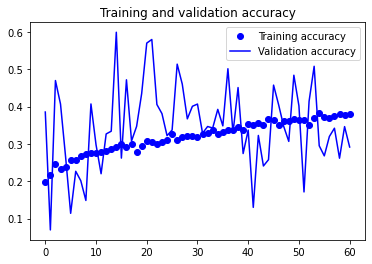

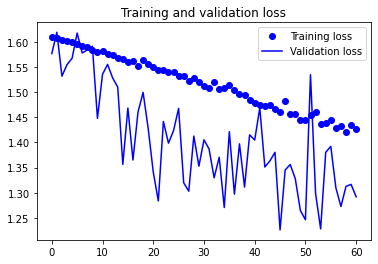

In [ ]:
import matplotlib.pyplot as plt   

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend() 

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
y_true = tf.concat([labels_batch for data_batch, labels_batch in test_dataset], axis = 0)
y_true_cat = np.argmax(y_true, -1)

In [ ]:
def test_model(model):
  pred_Y = model.predict(test_dataset, verbose = True)
  pred_Y_cat = np.argmax(pred_Y, -1)
  print('Accuracy on Test Data: %2.2f%%' % (accuracy_score(y_true_cat, pred_Y_cat)))
  print(classification_report(y_true_cat, pred_Y_cat))

  sns.heatmap(confusion_matrix(y_true_cat, pred_Y_cat), 
              annot=True, fmt="d", cbar = False, cmap = plt.cm.Blues)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 223, 223, 32)      416       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 110, 110, 64)      8256      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 55, 55, 64)       0         
 g2D)                                                 

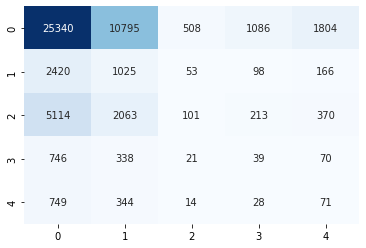

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model1.hdf5')
model.summary()
test_model(model)

### Second Model

In [ ]:
model2 = models.Sequential()
model2.add(layers.InputLayer(input_shape=(224, 224, 3)))
model2.add(data_augmentation)
model2.add(layers.Rescaling(1./255))

model2.add(layers.Conv2D(32, (2, 2), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(64, (2, 2), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(128, (2, 2), activation='relu'))
model2.add(layers.MaxPooling2D((3, 3)))

model2.add(layers.Conv2D(256, (2, 2), activation='relu'))
model2.add(layers.MaxPooling2D((5, 5)))

model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(5, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 223, 223, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                  

In [ ]:
training_dataset = training_dataset.shuffle(3190, reshuffle_each_iteration=True)
validation_dataset = validation_dataset.shuffle(3190, reshuffle_each_iteration=True)

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.0001)

model2.compile(run_eagerly=True,
              optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
checkpoint_filepath = '/content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model2.hdf5'

checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True,
                             #save_freq = "epoch", 
                             mode='min')

es = EarlyStopping(monitor='val_loss', 
                   mode='min', 
                   verbose=1, 
                   patience=15)

tqdm_callback = tfa.callbacks.TQDMProgressBar()

Training:   0%|           0/150 ETA: ?s,  ?epochs/s

Epoch 1/150


0/32           ETA: ?s - 

Epoch 1/150
32/32 [==============================] - ETA: 0s - loss: 1.6128 - accuracy: 0.1972
Epoch 00001: val_loss improved from inf to 1.63827, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model2.hdf5
32/32 [==============================] - 53s 906ms/step - loss: 1.6128 - accuracy: 0.1972 - val_loss: 1.6383 - val_accuracy: 0.1501
Epoch 2/150


0/32           ETA: ?s - 

Epoch 2/150
32/32 [==============================] - ETA: 0s - loss: 1.6125 - accuracy: 0.2016
Epoch 00002: val_loss improved from 1.63827 to 1.58706, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model2.hdf5
32/32 [==============================] - 28s 677ms/step - loss: 1.6125 - accuracy: 0.2016 - val_loss: 1.5871 - val_accuracy: 0.6570
Epoch 3/150


0/32           ETA: ?s - 

Epoch 3/150
32/32 [==============================] - ETA: 0s - loss: 1.6088 - accuracy: 0.2103
Epoch 00003: val_loss did not improve from 1.58706
32/32 [==============================] - 29s 715ms/step - loss: 1.6088 - accuracy: 0.2103 - val_loss: 1.6045 - val_accuracy: 0.2111
Epoch 4/150


0/32           ETA: ?s - 

Epoch 4/150
32/32 [==============================] - ETA: 0s - loss: 1.6114 - accuracy: 0.1940
Epoch 00004: val_loss did not improve from 1.58706
32/32 [==============================] - 28s 662ms/step - loss: 1.6114 - accuracy: 0.1940 - val_loss: 1.6085 - val_accuracy: 0.1664
Epoch 5/150


0/32           ETA: ?s - 

Epoch 5/150
32/32 [==============================] - ETA: 0s - loss: 1.6093 - accuracy: 0.2138
Epoch 00005: val_loss improved from 1.58706 to 1.58441, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model2.hdf5
32/32 [==============================] - 28s 683ms/step - loss: 1.6093 - accuracy: 0.2138 - val_loss: 1.5844 - val_accuracy: 0.4923
Epoch 6/150


0/32           ETA: ?s - 

Epoch 6/150
32/32 [==============================] - ETA: 0s - loss: 1.6079 - accuracy: 0.2113
Epoch 00006: val_loss improved from 1.58441 to 1.58265, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model2.hdf5
32/32 [==============================] - 28s 686ms/step - loss: 1.6079 - accuracy: 0.2113 - val_loss: 1.5826 - val_accuracy: 0.4299
Epoch 7/150


0/32           ETA: ?s - 

Epoch 7/150
32/32 [==============================] - ETA: 0s - loss: 1.6065 - accuracy: 0.2323
Epoch 00007: val_loss did not improve from 1.58265
32/32 [==============================] - 28s 670ms/step - loss: 1.6065 - accuracy: 0.2323 - val_loss: 1.5872 - val_accuracy: 0.2880
Epoch 8/150


0/32           ETA: ?s - 

Epoch 8/150
32/32 [==============================] - ETA: 0s - loss: 1.6076 - accuracy: 0.2257
Epoch 00008: val_loss did not improve from 1.58265
32/32 [==============================] - 28s 669ms/step - loss: 1.6076 - accuracy: 0.2257 - val_loss: 1.6078 - val_accuracy: 0.1553
Epoch 9/150


0/32           ETA: ?s - 

Epoch 9/150
32/32 [==============================] - ETA: 0s - loss: 1.6042 - accuracy: 0.2364
Epoch 00009: val_loss did not improve from 1.58265
32/32 [==============================] - 28s 672ms/step - loss: 1.6042 - accuracy: 0.2364 - val_loss: 1.5986 - val_accuracy: 0.1667
Epoch 10/150


0/32           ETA: ?s - 

Epoch 10/150
32/32 [==============================] - ETA: 0s - loss: 1.6023 - accuracy: 0.2408
Epoch 00010: val_loss improved from 1.58265 to 1.57294, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model2.hdf5
32/32 [==============================] - 29s 692ms/step - loss: 1.6023 - accuracy: 0.2408 - val_loss: 1.5729 - val_accuracy: 0.3009
Epoch 11/150


0/32           ETA: ?s - 

Epoch 11/150
32/32 [==============================] - ETA: 0s - loss: 1.6008 - accuracy: 0.2461
Epoch 00011: val_loss did not improve from 1.57294
32/32 [==============================] - 28s 672ms/step - loss: 1.6008 - accuracy: 0.2461 - val_loss: 1.6080 - val_accuracy: 0.1225
Epoch 12/150


0/32           ETA: ?s - 

Epoch 12/150
32/32 [==============================] - ETA: 0s - loss: 1.5977 - accuracy: 0.2571
Epoch 00012: val_loss improved from 1.57294 to 1.56883, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model2.hdf5
32/32 [==============================] - 28s 692ms/step - loss: 1.5977 - accuracy: 0.2571 - val_loss: 1.5688 - val_accuracy: 0.2225
Epoch 13/150


0/32           ETA: ?s - 

Epoch 13/150
32/32 [==============================] - ETA: 0s - loss: 1.5953 - accuracy: 0.2524
Epoch 00013: val_loss did not improve from 1.56883
32/32 [==============================] - 28s 675ms/step - loss: 1.5953 - accuracy: 0.2524 - val_loss: 1.5805 - val_accuracy: 0.1952
Epoch 14/150


0/32           ETA: ?s - 

Epoch 14/150
32/32 [==============================] - ETA: 0s - loss: 1.5957 - accuracy: 0.2586
Epoch 00014: val_loss improved from 1.56883 to 1.56881, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model2.hdf5
32/32 [==============================] - 28s 686ms/step - loss: 1.5957 - accuracy: 0.2586 - val_loss: 1.5688 - val_accuracy: 0.2556
Epoch 15/150


0/32           ETA: ?s - 

Epoch 15/150
32/32 [==============================] - ETA: 0s - loss: 1.5948 - accuracy: 0.2621
Epoch 00015: val_loss improved from 1.56881 to 1.55721, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model2.hdf5
32/32 [==============================] - 28s 690ms/step - loss: 1.5948 - accuracy: 0.2621 - val_loss: 1.5572 - val_accuracy: 0.2202
Epoch 16/150


0/32           ETA: ?s - 

Epoch 16/150
32/32 [==============================] - ETA: 0s - loss: 1.5910 - accuracy: 0.2605
Epoch 00016: val_loss improved from 1.55721 to 1.53260, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model2.hdf5
32/32 [==============================] - 28s 694ms/step - loss: 1.5910 - accuracy: 0.2605 - val_loss: 1.5326 - val_accuracy: 0.2715
Epoch 17/150


0/32           ETA: ?s - 

Epoch 17/150
32/32 [==============================] - ETA: 0s - loss: 1.5916 - accuracy: 0.2533
Epoch 00017: val_loss did not improve from 1.53260
32/32 [==============================] - 28s 669ms/step - loss: 1.5916 - accuracy: 0.2533 - val_loss: 1.5789 - val_accuracy: 0.1943
Epoch 18/150


0/32           ETA: ?s - 

Epoch 18/150
32/32 [==============================] - ETA: 0s - loss: 1.5876 - accuracy: 0.2674
Epoch 00018: val_loss did not improve from 1.53260
32/32 [==============================] - 28s 672ms/step - loss: 1.5876 - accuracy: 0.2674 - val_loss: 1.5785 - val_accuracy: 0.2157
Epoch 19/150


0/32           ETA: ?s - 

Epoch 19/150
32/32 [==============================] - ETA: 0s - loss: 1.5875 - accuracy: 0.2734
Epoch 00019: val_loss improved from 1.53260 to 1.52906, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model2.hdf5
32/32 [==============================] - 28s 690ms/step - loss: 1.5875 - accuracy: 0.2734 - val_loss: 1.5291 - val_accuracy: 0.3131
Epoch 20/150


0/32           ETA: ?s - 

Epoch 20/150
32/32 [==============================] - ETA: 0s - loss: 1.5909 - accuracy: 0.2655
Epoch 00020: val_loss did not improve from 1.52906
32/32 [==============================] - 28s 670ms/step - loss: 1.5909 - accuracy: 0.2655 - val_loss: 1.6380 - val_accuracy: 0.1348
Epoch 21/150


0/32           ETA: ?s - 

Epoch 21/150
32/32 [==============================] - ETA: 0s - loss: 1.5883 - accuracy: 0.2702
Epoch 00021: val_loss did not improve from 1.52906
32/32 [==============================] - 28s 673ms/step - loss: 1.5883 - accuracy: 0.2702 - val_loss: 1.5731 - val_accuracy: 0.2256
Epoch 22/150


0/32           ETA: ?s - 

Epoch 22/150
32/32 [==============================] - ETA: 0s - loss: 1.5823 - accuracy: 0.2730
Epoch 00022: val_loss did not improve from 1.52906
32/32 [==============================] - 28s 672ms/step - loss: 1.5823 - accuracy: 0.2730 - val_loss: 1.5844 - val_accuracy: 0.2023
Epoch 23/150


0/32           ETA: ?s - 

Epoch 23/150
32/32 [==============================] - ETA: 0s - loss: 1.5823 - accuracy: 0.2693
Epoch 00023: val_loss improved from 1.52906 to 1.52625, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model2.hdf5
32/32 [==============================] - 28s 689ms/step - loss: 1.5823 - accuracy: 0.2693 - val_loss: 1.5262 - val_accuracy: 0.2860
Epoch 24/150


0/32           ETA: ?s - 

Epoch 24/150
32/32 [==============================] - ETA: 0s - loss: 1.5835 - accuracy: 0.2655
Epoch 00024: val_loss improved from 1.52625 to 1.52116, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model2.hdf5
32/32 [==============================] - 29s 694ms/step - loss: 1.5835 - accuracy: 0.2655 - val_loss: 1.5212 - val_accuracy: 0.2738
Epoch 25/150


0/32           ETA: ?s - 

Epoch 25/150
32/32 [==============================] - ETA: 0s - loss: 1.5780 - accuracy: 0.2749
Epoch 00025: val_loss did not improve from 1.52116
32/32 [==============================] - 28s 676ms/step - loss: 1.5780 - accuracy: 0.2749 - val_loss: 1.5277 - val_accuracy: 0.2795
Epoch 26/150


0/32           ETA: ?s - 

Epoch 26/150
32/32 [==============================] - ETA: 0s - loss: 1.5803 - accuracy: 0.2727
Epoch 00026: val_loss improved from 1.52116 to 1.45933, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model2.hdf5
32/32 [==============================] - 28s 687ms/step - loss: 1.5803 - accuracy: 0.2727 - val_loss: 1.4593 - val_accuracy: 0.4066
Epoch 27/150


0/32           ETA: ?s - 

Epoch 27/150
32/32 [==============================] - ETA: 0s - loss: 1.5740 - accuracy: 0.2812
Epoch 00027: val_loss did not improve from 1.45933
32/32 [==============================] - 28s 675ms/step - loss: 1.5740 - accuracy: 0.2812 - val_loss: 1.5654 - val_accuracy: 0.2259
Epoch 28/150


0/32           ETA: ?s - 

Epoch 28/150
32/32 [==============================] - ETA: 0s - loss: 1.5777 - accuracy: 0.2734
Epoch 00028: val_loss improved from 1.45933 to 1.40847, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model2.hdf5
32/32 [==============================] - 28s 689ms/step - loss: 1.5777 - accuracy: 0.2734 - val_loss: 1.4085 - val_accuracy: 0.4536
Epoch 29/150


0/32           ETA: ?s - 

Epoch 29/150
32/32 [==============================] - ETA: 0s - loss: 1.5785 - accuracy: 0.2793
Epoch 00029: val_loss did not improve from 1.40847
32/32 [==============================] - 28s 675ms/step - loss: 1.5785 - accuracy: 0.2793 - val_loss: 1.4628 - val_accuracy: 0.3060
Epoch 30/150


0/32           ETA: ?s - 

Epoch 30/150
32/32 [==============================] - ETA: 0s - loss: 1.5731 - accuracy: 0.2918
Epoch 00030: val_loss did not improve from 1.40847
32/32 [==============================] - 28s 674ms/step - loss: 1.5731 - accuracy: 0.2918 - val_loss: 1.5301 - val_accuracy: 0.2860
Epoch 31/150


0/32           ETA: ?s - 

Epoch 31/150
32/32 [==============================] - ETA: 0s - loss: 1.5706 - accuracy: 0.2803
Epoch 00031: val_loss did not improve from 1.40847
32/32 [==============================] - 28s 673ms/step - loss: 1.5706 - accuracy: 0.2803 - val_loss: 1.4623 - val_accuracy: 0.2795
Epoch 32/150


0/32           ETA: ?s - 

Epoch 32/150
32/32 [==============================] - ETA: 0s - loss: 1.5669 - accuracy: 0.2871
Epoch 00032: val_loss improved from 1.40847 to 1.37738, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model2.hdf5
32/32 [==============================] - 29s 694ms/step - loss: 1.5669 - accuracy: 0.2871 - val_loss: 1.3774 - val_accuracy: 0.4262
Epoch 33/150


0/32           ETA: ?s - 

Epoch 33/150
32/32 [==============================] - ETA: 0s - loss: 1.5616 - accuracy: 0.2966
Epoch 00033: val_loss improved from 1.37738 to 1.36291, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model2.hdf5
32/32 [==============================] - 28s 691ms/step - loss: 1.5616 - accuracy: 0.2966 - val_loss: 1.3629 - val_accuracy: 0.4288
Epoch 34/150


0/32           ETA: ?s - 

Epoch 34/150
32/32 [==============================] - ETA: 0s - loss: 1.5667 - accuracy: 0.2865
Epoch 00034: val_loss improved from 1.36291 to 1.36270, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model2.hdf5
32/32 [==============================] - 29s 705ms/step - loss: 1.5667 - accuracy: 0.2865 - val_loss: 1.3627 - val_accuracy: 0.5068
Epoch 35/150


0/32           ETA: ?s - 

Epoch 35/150
32/32 [==============================] - ETA: 0s - loss: 1.5641 - accuracy: 0.2878
Epoch 00035: val_loss improved from 1.36270 to 1.34702, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model2.hdf5
32/32 [==============================] - 29s 703ms/step - loss: 1.5641 - accuracy: 0.2878 - val_loss: 1.3470 - val_accuracy: 0.5085
Epoch 36/150


0/32           ETA: ?s - 

Epoch 36/150
32/32 [==============================] - ETA: 0s - loss: 1.5570 - accuracy: 0.3009
Epoch 00036: val_loss did not improve from 1.34702
32/32 [==============================] - 30s 708ms/step - loss: 1.5570 - accuracy: 0.3009 - val_loss: 1.4676 - val_accuracy: 0.2781
Epoch 37/150


0/32           ETA: ?s - 

Epoch 37/150
32/32 [==============================] - ETA: 0s - loss: 1.5590 - accuracy: 0.2887
Epoch 00037: val_loss did not improve from 1.34702
32/32 [==============================] - 29s 698ms/step - loss: 1.5590 - accuracy: 0.2887 - val_loss: 1.4690 - val_accuracy: 0.3376
Epoch 38/150


0/32           ETA: ?s - 

Epoch 38/150
32/32 [==============================] - ETA: 0s - loss: 1.5565 - accuracy: 0.2928
Epoch 00038: val_loss did not improve from 1.34702
32/32 [==============================] - 28s 684ms/step - loss: 1.5565 - accuracy: 0.2928 - val_loss: 1.3908 - val_accuracy: 0.4046
Epoch 39/150


0/32           ETA: ?s - 

Epoch 39/150
32/32 [==============================] - ETA: 0s - loss: 1.5533 - accuracy: 0.3016
Epoch 00039: val_loss did not improve from 1.34702
32/32 [==============================] - 28s 682ms/step - loss: 1.5533 - accuracy: 0.3016 - val_loss: 1.3958 - val_accuracy: 0.3803
Epoch 40/150


0/32           ETA: ?s - 

Epoch 40/150
32/32 [==============================] - ETA: 0s - loss: 1.5547 - accuracy: 0.2934
Epoch 00040: val_loss did not improve from 1.34702
32/32 [==============================] - 29s 693ms/step - loss: 1.5547 - accuracy: 0.2934 - val_loss: 1.4691 - val_accuracy: 0.2943
Epoch 41/150


0/32           ETA: ?s - 

Epoch 41/150
32/32 [==============================] - ETA: 0s - loss: 1.5552 - accuracy: 0.3000
Epoch 00041: val_loss improved from 1.34702 to 1.28544, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model2.hdf5
32/32 [==============================] - 29s 698ms/step - loss: 1.5552 - accuracy: 0.3000 - val_loss: 1.2854 - val_accuracy: 0.5123
Epoch 42/150


0/32           ETA: ?s - 

Epoch 42/150
32/32 [==============================] - ETA: 0s - loss: 1.5515 - accuracy: 0.2987
Epoch 00042: val_loss did not improve from 1.28544
32/32 [==============================] - 29s 694ms/step - loss: 1.5515 - accuracy: 0.2987 - val_loss: 1.4080 - val_accuracy: 0.4211
Epoch 43/150


0/32           ETA: ?s - 

Epoch 43/150
32/32 [==============================] - ETA: 0s - loss: 1.5477 - accuracy: 0.3129
Epoch 00043: val_loss did not improve from 1.28544
32/32 [==============================] - 30s 724ms/step - loss: 1.5477 - accuracy: 0.3129 - val_loss: 1.3675 - val_accuracy: 0.4071
Epoch 44/150


0/32           ETA: ?s - 

Epoch 44/150
32/32 [==============================] - ETA: 0s - loss: 1.5519 - accuracy: 0.2947
Epoch 00044: val_loss did not improve from 1.28544
32/32 [==============================] - 29s 691ms/step - loss: 1.5519 - accuracy: 0.2947 - val_loss: 1.3161 - val_accuracy: 0.4308
Epoch 45/150


0/32           ETA: ?s - 

Epoch 45/150
32/32 [==============================] - ETA: 0s - loss: 1.5515 - accuracy: 0.2997
Epoch 00045: val_loss did not improve from 1.28544
32/32 [==============================] - 31s 734ms/step - loss: 1.5515 - accuracy: 0.2997 - val_loss: 1.4518 - val_accuracy: 0.2678
Epoch 46/150


0/32           ETA: ?s - 

Epoch 46/150
32/32 [==============================] - ETA: 0s - loss: 1.5485 - accuracy: 0.2940
Epoch 00046: val_loss did not improve from 1.28544
32/32 [==============================] - 31s 731ms/step - loss: 1.5485 - accuracy: 0.2940 - val_loss: 1.3828 - val_accuracy: 0.3715
Epoch 47/150


0/32           ETA: ?s - 

Epoch 47/150
32/32 [==============================] - ETA: 0s - loss: 1.5415 - accuracy: 0.3172
Epoch 00047: val_loss did not improve from 1.28544
32/32 [==============================] - 31s 742ms/step - loss: 1.5415 - accuracy: 0.3172 - val_loss: 1.3694 - val_accuracy: 0.4279
Epoch 48/150


0/32           ETA: ?s - 

Epoch 48/150
32/32 [==============================] - ETA: 0s - loss: 1.5347 - accuracy: 0.3185
Epoch 00048: val_loss did not improve from 1.28544
32/32 [==============================] - 31s 737ms/step - loss: 1.5347 - accuracy: 0.3185 - val_loss: 1.3091 - val_accuracy: 0.4829
Epoch 49/150


0/32           ETA: ?s - 

Epoch 49/150
32/32 [==============================] - ETA: 0s - loss: 1.5382 - accuracy: 0.3016
Epoch 00049: val_loss did not improve from 1.28544
32/32 [==============================] - 31s 728ms/step - loss: 1.5382 - accuracy: 0.3016 - val_loss: 1.3310 - val_accuracy: 0.4615
Epoch 50/150


0/32           ETA: ?s - 

Epoch 50/150
32/32 [==============================] - ETA: 0s - loss: 1.5287 - accuracy: 0.3132
Epoch 00050: val_loss improved from 1.28544 to 1.27215, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model2.hdf5
32/32 [==============================] - 32s 751ms/step - loss: 1.5287 - accuracy: 0.3132 - val_loss: 1.2722 - val_accuracy: 0.4900
Epoch 51/150


0/32           ETA: ?s - 

Epoch 51/150
32/32 [==============================] - ETA: 0s - loss: 1.5337 - accuracy: 0.3069
Epoch 00051: val_loss did not improve from 1.27215
32/32 [==============================] - 31s 736ms/step - loss: 1.5337 - accuracy: 0.3069 - val_loss: 1.3566 - val_accuracy: 0.3892
Epoch 52/150


0/32           ETA: ?s - 

Epoch 52/150
32/32 [==============================] - ETA: 0s - loss: 1.5461 - accuracy: 0.3047
Epoch 00052: val_loss did not improve from 1.27215
32/32 [==============================] - 31s 737ms/step - loss: 1.5461 - accuracy: 0.3047 - val_loss: 1.3896 - val_accuracy: 0.4208
Epoch 53/150


0/32           ETA: ?s - 

Epoch 53/150
32/32 [==============================] - ETA: 0s - loss: 1.5227 - accuracy: 0.3157
Epoch 00053: val_loss did not improve from 1.27215
32/32 [==============================] - 31s 734ms/step - loss: 1.5227 - accuracy: 0.3157 - val_loss: 1.4336 - val_accuracy: 0.3513
Epoch 54/150


0/32           ETA: ?s - 

Epoch 54/150
32/32 [==============================] - ETA: 0s - loss: 1.5248 - accuracy: 0.3257
Epoch 00054: val_loss did not improve from 1.27215
32/32 [==============================] - 31s 733ms/step - loss: 1.5248 - accuracy: 0.3257 - val_loss: 1.2863 - val_accuracy: 0.4644
Epoch 55/150


0/32           ETA: ?s - 

Epoch 55/150
32/32 [==============================] - ETA: 0s - loss: 1.5270 - accuracy: 0.3179
Epoch 00055: val_loss did not improve from 1.27215
32/32 [==============================] - 31s 737ms/step - loss: 1.5270 - accuracy: 0.3179 - val_loss: 1.2962 - val_accuracy: 0.4521
Epoch 56/150


0/32           ETA: ?s - 

Epoch 56/150
32/32 [==============================] - ETA: 0s - loss: 1.5198 - accuracy: 0.3163
Epoch 00056: val_loss did not improve from 1.27215
32/32 [==============================] - 31s 739ms/step - loss: 1.5198 - accuracy: 0.3163 - val_loss: 1.3143 - val_accuracy: 0.4197
Epoch 57/150


0/32           ETA: ?s - 

Epoch 57/150
32/32 [==============================] - ETA: 0s - loss: 1.5209 - accuracy: 0.3223
Epoch 00057: val_loss did not improve from 1.27215
32/32 [==============================] - 31s 738ms/step - loss: 1.5209 - accuracy: 0.3223 - val_loss: 1.3313 - val_accuracy: 0.3952
Epoch 58/150


0/32           ETA: ?s - 

Epoch 58/150
32/32 [==============================] - ETA: 0s - loss: 1.5183 - accuracy: 0.3144
Epoch 00058: val_loss did not improve from 1.27215
32/32 [==============================] - 31s 735ms/step - loss: 1.5183 - accuracy: 0.3144 - val_loss: 1.2969 - val_accuracy: 0.3792
Epoch 59/150


0/32           ETA: ?s - 

Epoch 59/150
32/32 [==============================] - ETA: 0s - loss: 1.5144 - accuracy: 0.3232
Epoch 00059: val_loss did not improve from 1.27215
32/32 [==============================] - 31s 732ms/step - loss: 1.5144 - accuracy: 0.3232 - val_loss: 1.3183 - val_accuracy: 0.3954
Epoch 60/150


0/32           ETA: ?s - 

Epoch 60/150
32/32 [==============================] - ETA: 0s - loss: 1.5098 - accuracy: 0.3219
Epoch 00060: val_loss improved from 1.27215 to 1.25044, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model2.hdf5
32/32 [==============================] - 31s 746ms/step - loss: 1.5098 - accuracy: 0.3219 - val_loss: 1.2504 - val_accuracy: 0.4504
Epoch 61/150


0/32           ETA: ?s - 

Epoch 61/150
32/32 [==============================] - ETA: 0s - loss: 1.5079 - accuracy: 0.3348
Epoch 00061: val_loss did not improve from 1.25044
32/32 [==============================] - 31s 739ms/step - loss: 1.5079 - accuracy: 0.3348 - val_loss: 1.3320 - val_accuracy: 0.3484
Epoch 62/150


0/32           ETA: ?s - 

Epoch 62/150
32/32 [==============================] - ETA: 0s - loss: 1.5037 - accuracy: 0.3298
Epoch 00062: val_loss did not improve from 1.25044
32/32 [==============================] - 31s 733ms/step - loss: 1.5037 - accuracy: 0.3298 - val_loss: 1.2892 - val_accuracy: 0.4054
Epoch 63/150


0/32           ETA: ?s - 

Epoch 63/150
32/32 [==============================] - ETA: 0s - loss: 1.4946 - accuracy: 0.3357
Epoch 00063: val_loss did not improve from 1.25044
32/32 [==============================] - 31s 738ms/step - loss: 1.4946 - accuracy: 0.3357 - val_loss: 1.2723 - val_accuracy: 0.4231
Epoch 64/150


0/32           ETA: ?s - 

Epoch 64/150
32/32 [==============================] - ETA: 0s - loss: 1.4978 - accuracy: 0.3414
Epoch 00064: val_loss did not improve from 1.25044
32/32 [==============================] - 31s 739ms/step - loss: 1.4978 - accuracy: 0.3414 - val_loss: 1.2999 - val_accuracy: 0.4322
Epoch 65/150


0/32           ETA: ?s - 

Epoch 65/150
32/32 [==============================] - ETA: 0s - loss: 1.4978 - accuracy: 0.3354
Epoch 00065: val_loss did not improve from 1.25044
32/32 [==============================] - 31s 735ms/step - loss: 1.4978 - accuracy: 0.3354 - val_loss: 1.2604 - val_accuracy: 0.4798
Epoch 66/150


0/32           ETA: ?s - 

Epoch 66/150
32/32 [==============================] - ETA: 0s - loss: 1.4852 - accuracy: 0.3404
Epoch 00066: val_loss did not improve from 1.25044
32/32 [==============================] - 31s 735ms/step - loss: 1.4852 - accuracy: 0.3404 - val_loss: 1.2774 - val_accuracy: 0.4288
Epoch 67/150


0/32           ETA: ?s - 

Epoch 67/150
32/32 [==============================] - ETA: 0s - loss: 1.4835 - accuracy: 0.3448
Epoch 00067: val_loss did not improve from 1.25044
32/32 [==============================] - 31s 745ms/step - loss: 1.4835 - accuracy: 0.3448 - val_loss: 1.3439 - val_accuracy: 0.3621
Epoch 68/150


0/32           ETA: ?s - 

Epoch 68/150
32/32 [==============================] - ETA: 0s - loss: 1.4870 - accuracy: 0.3417
Epoch 00068: val_loss did not improve from 1.25044
32/32 [==============================] - 31s 736ms/step - loss: 1.4870 - accuracy: 0.3417 - val_loss: 1.3888 - val_accuracy: 0.3573
Epoch 69/150


0/32           ETA: ?s - 

Epoch 69/150
32/32 [==============================] - ETA: 0s - loss: 1.5017 - accuracy: 0.3241
Epoch 00069: val_loss did not improve from 1.25044
32/32 [==============================] - 32s 743ms/step - loss: 1.5017 - accuracy: 0.3241 - val_loss: 1.2535 - val_accuracy: 0.4128
Epoch 70/150


0/32           ETA: ?s - 

Epoch 70/150
32/32 [==============================] - ETA: 0s - loss: 1.4791 - accuracy: 0.3470
Epoch 00070: val_loss did not improve from 1.25044
32/32 [==============================] - 31s 745ms/step - loss: 1.4791 - accuracy: 0.3470 - val_loss: 1.3108 - val_accuracy: 0.3487
Epoch 71/150


0/32           ETA: ?s - 

Epoch 71/150
32/32 [==============================] - ETA: 0s - loss: 1.4773 - accuracy: 0.3411
Epoch 00071: val_loss did not improve from 1.25044
32/32 [==============================] - 32s 756ms/step - loss: 1.4773 - accuracy: 0.3411 - val_loss: 1.3298 - val_accuracy: 0.3875
Epoch 72/150


0/32           ETA: ?s - 

Epoch 72/150
32/32 [==============================] - ETA: 0s - loss: 1.4723 - accuracy: 0.3420
Epoch 00072: val_loss did not improve from 1.25044
32/32 [==============================] - 31s 735ms/step - loss: 1.4723 - accuracy: 0.3420 - val_loss: 1.2724 - val_accuracy: 0.3977
Epoch 73/150


0/32           ETA: ?s - 

Epoch 73/150
32/32 [==============================] - ETA: 0s - loss: 1.4621 - accuracy: 0.3558
Epoch 00073: val_loss did not improve from 1.25044
32/32 [==============================] - 31s 739ms/step - loss: 1.4621 - accuracy: 0.3558 - val_loss: 1.3060 - val_accuracy: 0.3328
Epoch 74/150


0/32           ETA: ?s - 

Epoch 74/150
32/32 [==============================] - ETA: 0s - loss: 1.4649 - accuracy: 0.3505
Epoch 00074: val_loss did not improve from 1.25044
32/32 [==============================] - 31s 739ms/step - loss: 1.4649 - accuracy: 0.3505 - val_loss: 1.3241 - val_accuracy: 0.3464
Epoch 75/150


0/32           ETA: ?s - 

Epoch 75/150
32/32 [==============================] - ETA: 0s - loss: 1.4727 - accuracy: 0.3404
Epoch 00075: val_loss did not improve from 1.25044
32/32 [==============================] - 31s 740ms/step - loss: 1.4727 - accuracy: 0.3404 - val_loss: 1.2771 - val_accuracy: 0.3501
Epoch 00075: early stopping


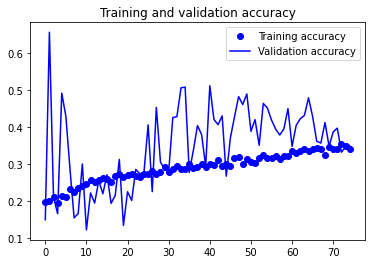

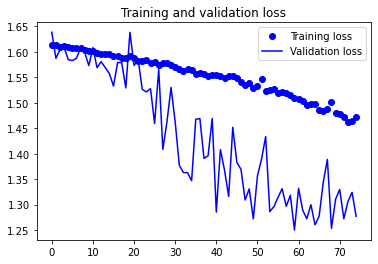

In [ ]:
history = model2.fit(training_dataset,
          validation_data=validation_dataset,
          callbacks=[es,checkpoint,tqdm_callback],
          epochs=150)

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend() 

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 223, 223, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                  

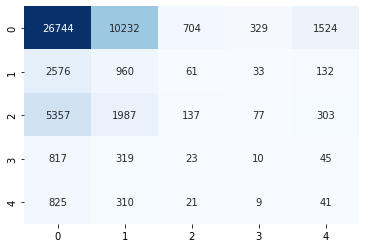

In [ ]:
model2 = load_model('/content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model2.hdf5')
model2.summary()
test_model(model2)

### Third Model

In [ ]:
model3 = models.Sequential()
model3.add(layers.InputLayer(input_shape=(224, 224, 3)))
model3.add(data_augmentation)
model3.add(layers.Rescaling(1./255))

model3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((3, 3)))

model3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((3, 3)))

model3.add(layers.Flatten())
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(1024, activation='relu'))
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(5, activation='softmax'))

In [ ]:
model3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                 

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.0001)

model3.compile(run_eagerly=True,
              optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
checkpoint_filepath = '/content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model3.hdf5'

checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True,
                             #save_freq = "epoch", 
                             mode='min')

es = EarlyStopping(monitor='val_loss', 
                   mode='min', 
                   verbose=1, 
                   patience=15)

tqdm_callback = tfa.callbacks.TQDMProgressBar()

Training:   0%|           0/150 ETA: ?s,  ?epochs/s

Epoch 1/150


0/32           ETA: ?s - 

Epoch 1/150
32/32 [==============================] - ETA: 0s - loss: 1.6112 - accuracy: 0.2063
Epoch 00001: val_loss improved from inf to 1.62138, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model3.hdf5
32/32 [==============================] - 35s 781ms/step - loss: 1.6112 - accuracy: 0.2063 - val_loss: 1.6214 - val_accuracy: 0.0630
Epoch 2/150


0/32           ETA: ?s - 

Epoch 2/150
32/32 [==============================] - ETA: 0s - loss: 1.6060 - accuracy: 0.2235
Epoch 00002: val_loss improved from 1.62138 to 1.61097, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model3.hdf5
32/32 [==============================] - 33s 783ms/step - loss: 1.6060 - accuracy: 0.2235 - val_loss: 1.6110 - val_accuracy: 0.1219
Epoch 3/150


0/32           ETA: ?s - 

Epoch 3/150
32/32 [==============================] - ETA: 0s - loss: 1.6006 - accuracy: 0.2511
Epoch 00003: val_loss improved from 1.61097 to 1.54226, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model3.hdf5
32/32 [==============================] - 33s 779ms/step - loss: 1.6006 - accuracy: 0.2511 - val_loss: 1.5423 - val_accuracy: 0.3473
Epoch 4/150


0/32           ETA: ?s - 

Epoch 4/150
32/32 [==============================] - ETA: 0s - loss: 1.5959 - accuracy: 0.2646
Epoch 00004: val_loss did not improve from 1.54226
32/32 [==============================] - 32s 749ms/step - loss: 1.5959 - accuracy: 0.2646 - val_loss: 1.5878 - val_accuracy: 0.1533
Epoch 5/150


0/32           ETA: ?s - 

Epoch 5/150
32/32 [==============================] - ETA: 0s - loss: 1.5995 - accuracy: 0.2555
Epoch 00005: val_loss did not improve from 1.54226
32/32 [==============================] - 32s 750ms/step - loss: 1.5995 - accuracy: 0.2555 - val_loss: 1.5819 - val_accuracy: 0.1869
Epoch 6/150


0/32           ETA: ?s - 

Epoch 6/150
32/32 [==============================] - ETA: 0s - loss: 1.5924 - accuracy: 0.2611
Epoch 00006: val_loss did not improve from 1.54226
32/32 [==============================] - 32s 746ms/step - loss: 1.5924 - accuracy: 0.2611 - val_loss: 1.5709 - val_accuracy: 0.1746
Epoch 7/150


0/32           ETA: ?s - 

Epoch 7/150
32/32 [==============================] - ETA: 0s - loss: 1.5893 - accuracy: 0.2577
Epoch 00007: val_loss did not improve from 1.54226
32/32 [==============================] - 32s 744ms/step - loss: 1.5893 - accuracy: 0.2577 - val_loss: 1.5971 - val_accuracy: 0.2584
Epoch 8/150


0/32           ETA: ?s - 

Epoch 8/150
32/32 [==============================] - ETA: 0s - loss: 1.5824 - accuracy: 0.2762
Epoch 00008: val_loss improved from 1.54226 to 1.50728, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model3.hdf5
32/32 [==============================] - 33s 779ms/step - loss: 1.5824 - accuracy: 0.2762 - val_loss: 1.5073 - val_accuracy: 0.3066
Epoch 9/150


0/32           ETA: ?s - 

Epoch 9/150
32/32 [==============================] - ETA: 0s - loss: 1.5792 - accuracy: 0.2755
Epoch 00009: val_loss did not improve from 1.50728
32/32 [==============================] - 32s 748ms/step - loss: 1.5792 - accuracy: 0.2755 - val_loss: 1.5700 - val_accuracy: 0.2208
Epoch 10/150


0/32           ETA: ?s - 

Epoch 10/150
32/32 [==============================] - ETA: 0s - loss: 1.5716 - accuracy: 0.2809
Epoch 00010: val_loss improved from 1.50728 to 1.47604, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model3.hdf5
32/32 [==============================] - 32s 774ms/step - loss: 1.5716 - accuracy: 0.2809 - val_loss: 1.4760 - val_accuracy: 0.2259
Epoch 11/150


0/32           ETA: ?s - 

Epoch 11/150
32/32 [==============================] - ETA: 0s - loss: 1.5655 - accuracy: 0.2928
Epoch 00011: val_loss improved from 1.47604 to 1.34418, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model3.hdf5
32/32 [==============================] - 33s 778ms/step - loss: 1.5655 - accuracy: 0.2928 - val_loss: 1.3442 - val_accuracy: 0.6325
Epoch 12/150


0/32           ETA: ?s - 

Epoch 12/150
32/32 [==============================] - ETA: 0s - loss: 1.5640 - accuracy: 0.2803
Epoch 00012: val_loss did not improve from 1.34418
32/32 [==============================] - 32s 756ms/step - loss: 1.5640 - accuracy: 0.2803 - val_loss: 1.5416 - val_accuracy: 0.2672
Epoch 13/150


0/32           ETA: ?s - 

Epoch 13/150
32/32 [==============================] - ETA: 0s - loss: 1.5570 - accuracy: 0.2925
Epoch 00013: val_loss did not improve from 1.34418
32/32 [==============================] - 32s 753ms/step - loss: 1.5570 - accuracy: 0.2925 - val_loss: 1.5387 - val_accuracy: 0.1601
Epoch 14/150


0/32           ETA: ?s - 

Epoch 14/150
32/32 [==============================] - ETA: 0s - loss: 1.5555 - accuracy: 0.2897
Epoch 00014: val_loss did not improve from 1.34418
32/32 [==============================] - 32s 749ms/step - loss: 1.5555 - accuracy: 0.2897 - val_loss: 1.5954 - val_accuracy: 0.1342
Epoch 15/150


0/32           ETA: ?s - 

Epoch 15/150
32/32 [==============================] - ETA: 0s - loss: 1.5509 - accuracy: 0.3006
Epoch 00015: val_loss did not improve from 1.34418
32/32 [==============================] - 32s 748ms/step - loss: 1.5509 - accuracy: 0.3006 - val_loss: 1.5356 - val_accuracy: 0.2527
Epoch 16/150


0/32           ETA: ?s - 

Epoch 16/150
32/32 [==============================] - ETA: 0s - loss: 1.5463 - accuracy: 0.3066
Epoch 00016: val_loss did not improve from 1.34418
32/32 [==============================] - 32s 745ms/step - loss: 1.5463 - accuracy: 0.3066 - val_loss: 1.3921 - val_accuracy: 0.4678
Epoch 17/150


0/32           ETA: ?s - 

Epoch 17/150
32/32 [==============================] - ETA: 0s - loss: 1.5414 - accuracy: 0.3060
Epoch 00017: val_loss did not improve from 1.34418
32/32 [==============================] - 32s 752ms/step - loss: 1.5414 - accuracy: 0.3060 - val_loss: 1.3522 - val_accuracy: 0.5533
Epoch 18/150


0/32           ETA: ?s - 

Epoch 18/150
32/32 [==============================] - ETA: 0s - loss: 1.5331 - accuracy: 0.3097
Epoch 00018: val_loss did not improve from 1.34418
32/32 [==============================] - 32s 751ms/step - loss: 1.5331 - accuracy: 0.3097 - val_loss: 1.4678 - val_accuracy: 0.3635
Epoch 19/150


0/32           ETA: ?s - 

Epoch 19/150
32/32 [==============================] - ETA: 0s - loss: 1.5227 - accuracy: 0.3285
Epoch 00019: val_loss did not improve from 1.34418
32/32 [==============================] - 32s 743ms/step - loss: 1.5227 - accuracy: 0.3285 - val_loss: 1.4579 - val_accuracy: 0.3806
Epoch 20/150


0/32           ETA: ?s - 

Epoch 20/150
32/32 [==============================] - ETA: 0s - loss: 1.5232 - accuracy: 0.3216
Epoch 00020: val_loss improved from 1.34418 to 1.32980, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model3.hdf5
32/32 [==============================] - 33s 783ms/step - loss: 1.5232 - accuracy: 0.3216 - val_loss: 1.3298 - val_accuracy: 0.3940
Epoch 21/150


0/32           ETA: ?s - 

Epoch 21/150
32/32 [==============================] - ETA: 0s - loss: 1.5119 - accuracy: 0.3169
Epoch 00021: val_loss improved from 1.32980 to 1.32141, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model3.hdf5
32/32 [==============================] - 33s 794ms/step - loss: 1.5119 - accuracy: 0.3169 - val_loss: 1.3214 - val_accuracy: 0.3442
Epoch 22/150


0/32           ETA: ?s - 

Epoch 22/150
32/32 [==============================] - ETA: 0s - loss: 1.5125 - accuracy: 0.3223
Epoch 00022: val_loss did not improve from 1.32141
32/32 [==============================] - 32s 753ms/step - loss: 1.5125 - accuracy: 0.3223 - val_loss: 1.5225 - val_accuracy: 0.2764
Epoch 23/150


0/32           ETA: ?s - 

Epoch 23/150
32/32 [==============================] - ETA: 0s - loss: 1.5144 - accuracy: 0.3260
Epoch 00023: val_loss improved from 1.32141 to 1.22243, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model3.hdf5
32/32 [==============================] - 33s 792ms/step - loss: 1.5144 - accuracy: 0.3260 - val_loss: 1.2224 - val_accuracy: 0.6142
Epoch 24/150


0/32           ETA: ?s - 

Epoch 24/150
32/32 [==============================] - ETA: 0s - loss: 1.5035 - accuracy: 0.3332
Epoch 00024: val_loss did not improve from 1.22243
32/32 [==============================] - 32s 746ms/step - loss: 1.5035 - accuracy: 0.3332 - val_loss: 1.2723 - val_accuracy: 0.5724
Epoch 25/150


0/32           ETA: ?s - 

Epoch 25/150
32/32 [==============================] - ETA: 0s - loss: 1.5074 - accuracy: 0.3166
Epoch 00025: val_loss did not improve from 1.22243
32/32 [==============================] - 32s 747ms/step - loss: 1.5074 - accuracy: 0.3166 - val_loss: 1.5034 - val_accuracy: 0.1729
Epoch 26/150


0/32           ETA: ?s - 

Epoch 26/150
32/32 [==============================] - ETA: 0s - loss: 1.4913 - accuracy: 0.3351
Epoch 00026: val_loss did not improve from 1.22243
32/32 [==============================] - 32s 747ms/step - loss: 1.4913 - accuracy: 0.3351 - val_loss: 1.4032 - val_accuracy: 0.3715
Epoch 27/150


0/32           ETA: ?s - 

Epoch 27/150
32/32 [==============================] - ETA: 0s - loss: 1.4915 - accuracy: 0.3354
Epoch 00027: val_loss did not improve from 1.22243
32/32 [==============================] - 32s 753ms/step - loss: 1.4915 - accuracy: 0.3354 - val_loss: 1.2442 - val_accuracy: 0.4553
Epoch 28/150


0/32           ETA: ?s - 

Epoch 28/150
32/32 [==============================] - ETA: 0s - loss: 1.4903 - accuracy: 0.3364
Epoch 00028: val_loss did not improve from 1.22243
32/32 [==============================] - 32s 749ms/step - loss: 1.4903 - accuracy: 0.3364 - val_loss: 1.4040 - val_accuracy: 0.3479
Epoch 29/150


0/32           ETA: ?s - 

Epoch 29/150
32/32 [==============================] - ETA: 0s - loss: 1.4805 - accuracy: 0.3429
Epoch 00029: val_loss did not improve from 1.22243
32/32 [==============================] - 32s 748ms/step - loss: 1.4805 - accuracy: 0.3429 - val_loss: 1.2584 - val_accuracy: 0.4969
Epoch 30/150


0/32           ETA: ?s - 

Epoch 30/150
32/32 [==============================] - ETA: 0s - loss: 1.4725 - accuracy: 0.3520
Epoch 00030: val_loss did not improve from 1.22243
32/32 [==============================] - 32s 754ms/step - loss: 1.4725 - accuracy: 0.3520 - val_loss: 1.4251 - val_accuracy: 0.3393
Epoch 31/150


0/32           ETA: ?s - 

Epoch 31/150
32/32 [==============================] - ETA: 0s - loss: 1.4684 - accuracy: 0.3552
Epoch 00031: val_loss did not improve from 1.22243
32/32 [==============================] - 32s 754ms/step - loss: 1.4684 - accuracy: 0.3552 - val_loss: 1.3348 - val_accuracy: 0.3242
Epoch 32/150


0/32           ETA: ?s - 

Epoch 32/150
32/32 [==============================] - ETA: 0s - loss: 1.4607 - accuracy: 0.3498
Epoch 00032: val_loss did not improve from 1.22243
32/32 [==============================] - 32s 761ms/step - loss: 1.4607 - accuracy: 0.3498 - val_loss: 1.4628 - val_accuracy: 0.2744
Epoch 33/150


0/32           ETA: ?s - 

Epoch 33/150
32/32 [==============================] - ETA: 0s - loss: 1.4516 - accuracy: 0.3489
Epoch 00033: val_loss did not improve from 1.22243
32/32 [==============================] - 32s 756ms/step - loss: 1.4516 - accuracy: 0.3489 - val_loss: 1.4052 - val_accuracy: 0.2969
Epoch 34/150


0/32           ETA: ?s - 

Epoch 34/150
32/32 [==============================] - ETA: 0s - loss: 1.4747 - accuracy: 0.3483
Epoch 00034: val_loss did not improve from 1.22243
32/32 [==============================] - 32s 754ms/step - loss: 1.4747 - accuracy: 0.3483 - val_loss: 1.3798 - val_accuracy: 0.3778
Epoch 35/150


0/32           ETA: ?s - 

Epoch 35/150
32/32 [==============================] - ETA: 0s - loss: 1.4581 - accuracy: 0.3574
Epoch 00035: val_loss did not improve from 1.22243
32/32 [==============================] - 32s 758ms/step - loss: 1.4581 - accuracy: 0.3574 - val_loss: 1.5358 - val_accuracy: 0.1370
Epoch 36/150


0/32           ETA: ?s - 

Epoch 36/150
32/32 [==============================] - ETA: 0s - loss: 1.4496 - accuracy: 0.3539
Epoch 00036: val_loss did not improve from 1.22243
32/32 [==============================] - 32s 758ms/step - loss: 1.4496 - accuracy: 0.3539 - val_loss: 1.4715 - val_accuracy: 0.2877
Epoch 37/150


0/32           ETA: ?s - 

Epoch 37/150
32/32 [==============================] - ETA: 0s - loss: 1.4381 - accuracy: 0.3702
Epoch 00037: val_loss did not improve from 1.22243
32/32 [==============================] - 32s 755ms/step - loss: 1.4381 - accuracy: 0.3702 - val_loss: 1.3780 - val_accuracy: 0.3245
Epoch 38/150


0/32           ETA: ?s - 

Epoch 38/150
32/32 [==============================] - ETA: 0s - loss: 1.4337 - accuracy: 0.3715
Epoch 00038: val_loss did not improve from 1.22243
32/32 [==============================] - 32s 760ms/step - loss: 1.4337 - accuracy: 0.3715 - val_loss: 1.3706 - val_accuracy: 0.2712
Epoch 00038: early stopping


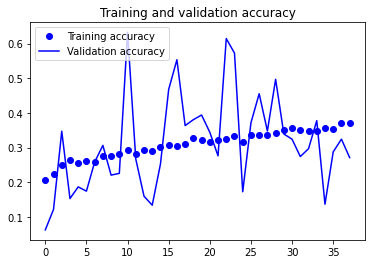

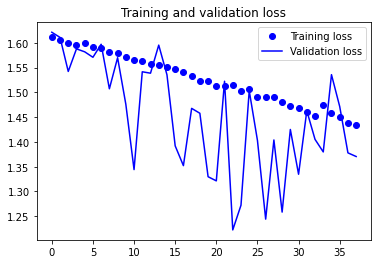

In [ ]:
history = model3.fit(training_dataset,
          validation_data=validation_dataset,
          callbacks=[es,checkpoint,tqdm_callback],
          epochs=150)

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend() 

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                 

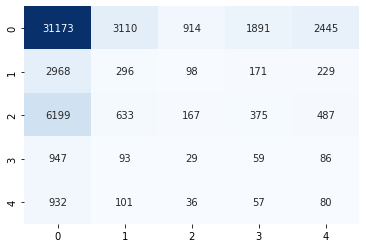

In [ ]:
model3 = load_model('/content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model3.hdf5')
model3.summary()
test_model(model3)

###Fourth model

In [ ]:
model4 = models.Sequential()
model4.add(layers.InputLayer(input_shape=(224, 224, 3)))
model4.add(data_augmentation)
model4.add(layers.Rescaling(1./255))

model4.add(layers.Conv2D(32, (2, 2), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Conv2D(64, (2, 2), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Conv2D(128, (2, 2), activation='relu'))
model4.add(layers.MaxPooling2D((3, 3)))

model4.add(layers.Conv2D(128, (2, 2), activation='relu'))
model4.add(layers.MaxPooling2D((3, 3)))

model4.add(layers.Flatten())
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(2048, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(5, activation='softmax'))

In [ ]:
model4.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling_14 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 conv2d_56 (Conv2D)          (None, 223, 223, 32)      416       
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 110, 110, 64)      8256      
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 55, 55, 64)       0         
 g2D)                                                

Training:   0%|           0/150 ETA: ?s,  ?epochs/s

Epoch 1/150


0/32           ETA: ?s - 

Epoch 1/150
32/32 [==============================] - ETA: 0s - loss: 1.6153 - accuracy: 0.1890
Epoch 00001: val_loss improved from inf to 1.57925, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model4.hdf5
32/32 [==============================] - 33s 732ms/step - loss: 1.6153 - accuracy: 0.1890 - val_loss: 1.5793 - val_accuracy: 0.4832
Epoch 2/150


0/32           ETA: ?s - 

Epoch 2/150
32/32 [==============================] - ETA: 0s - loss: 1.6092 - accuracy: 0.2088
Epoch 00002: val_loss improved from 1.57925 to 1.54261, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model4.hdf5
32/32 [==============================] - 31s 751ms/step - loss: 1.6092 - accuracy: 0.2088 - val_loss: 1.5426 - val_accuracy: 0.6513
Epoch 3/150


0/32           ETA: ?s - 

Epoch 3/150
32/32 [==============================] - ETA: 0s - loss: 1.6084 - accuracy: 0.2197
Epoch 00003: val_loss did not improve from 1.54261
32/32 [==============================] - 31s 721ms/step - loss: 1.6084 - accuracy: 0.2197 - val_loss: 1.5603 - val_accuracy: 0.5427
Epoch 4/150


0/32           ETA: ?s - 

Epoch 4/150
32/32 [==============================] - ETA: 0s - loss: 1.6041 - accuracy: 0.2226
Epoch 00004: val_loss did not improve from 1.54261
32/32 [==============================] - 30s 698ms/step - loss: 1.6041 - accuracy: 0.2226 - val_loss: 1.6055 - val_accuracy: 0.1541
Epoch 5/150


0/32           ETA: ?s - 

Epoch 5/150
32/32 [==============================] - ETA: 0s - loss: 1.6023 - accuracy: 0.2473
Epoch 00005: val_loss did not improve from 1.54261
32/32 [==============================] - 32s 775ms/step - loss: 1.6023 - accuracy: 0.2473 - val_loss: 1.5647 - val_accuracy: 0.2897
Epoch 6/150


0/32           ETA: ?s - 

Epoch 6/150
32/32 [==============================] - ETA: 0s - loss: 1.5983 - accuracy: 0.2527
Epoch 00006: val_loss did not improve from 1.54261
32/32 [==============================] - 30s 705ms/step - loss: 1.5983 - accuracy: 0.2527 - val_loss: 1.5642 - val_accuracy: 0.2140
Epoch 7/150


0/32           ETA: ?s - 

Epoch 7/150
32/32 [==============================] - ETA: 0s - loss: 1.5998 - accuracy: 0.2508
Epoch 00007: val_loss improved from 1.54261 to 1.52610, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model4.hdf5
32/32 [==============================] - 30s 726ms/step - loss: 1.5998 - accuracy: 0.2508 - val_loss: 1.5261 - val_accuracy: 0.3171
Epoch 8/150


0/32           ETA: ?s - 

Epoch 8/150
32/32 [==============================] - ETA: 0s - loss: 1.5937 - accuracy: 0.2592
Epoch 00008: val_loss did not improve from 1.52610
32/32 [==============================] - 29s 680ms/step - loss: 1.5937 - accuracy: 0.2592 - val_loss: 1.5551 - val_accuracy: 0.2117
Epoch 9/150


0/32           ETA: ?s - 

Epoch 9/150
32/32 [==============================] - ETA: 0s - loss: 1.5931 - accuracy: 0.2621
Epoch 00009: val_loss improved from 1.52610 to 1.51796, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model4.hdf5
32/32 [==============================] - 30s 720ms/step - loss: 1.5931 - accuracy: 0.2621 - val_loss: 1.5180 - val_accuracy: 0.2980
Epoch 10/150


0/32           ETA: ?s - 

Epoch 10/150
32/32 [==============================] - ETA: 0s - loss: 1.5882 - accuracy: 0.2627
Epoch 00010: val_loss improved from 1.51796 to 1.49329, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model4.hdf5
32/32 [==============================] - 31s 733ms/step - loss: 1.5882 - accuracy: 0.2627 - val_loss: 1.4933 - val_accuracy: 0.3510
Epoch 11/150


0/32           ETA: ?s - 

Epoch 11/150
32/32 [==============================] - ETA: 0s - loss: 1.5883 - accuracy: 0.2674
Epoch 00011: val_loss did not improve from 1.49329
32/32 [==============================] - 30s 701ms/step - loss: 1.5883 - accuracy: 0.2674 - val_loss: 1.5925 - val_accuracy: 0.2054
Epoch 12/150


0/32           ETA: ?s - 

Epoch 12/150
32/32 [==============================] - ETA: 0s - loss: 1.5838 - accuracy: 0.2774
Epoch 00012: val_loss improved from 1.49329 to 1.45168, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model4.hdf5
32/32 [==============================] - 31s 738ms/step - loss: 1.5838 - accuracy: 0.2774 - val_loss: 1.4517 - val_accuracy: 0.4285
Epoch 13/150


0/32           ETA: ?s - 

Epoch 13/150
32/32 [==============================] - ETA: 0s - loss: 1.5842 - accuracy: 0.2561
Epoch 00013: val_loss did not improve from 1.45168
32/32 [==============================] - 31s 719ms/step - loss: 1.5842 - accuracy: 0.2561 - val_loss: 1.5854 - val_accuracy: 0.1943
Epoch 14/150


0/32           ETA: ?s - 

Epoch 14/150
32/32 [==============================] - ETA: 0s - loss: 1.5826 - accuracy: 0.2690
Epoch 00014: val_loss did not improve from 1.45168
32/32 [==============================] - 30s 711ms/step - loss: 1.5826 - accuracy: 0.2690 - val_loss: 1.5314 - val_accuracy: 0.2231
Epoch 15/150


0/32           ETA: ?s - 

Epoch 15/150
32/32 [==============================] - ETA: 0s - loss: 1.5797 - accuracy: 0.2821
Epoch 00015: val_loss did not improve from 1.45168
32/32 [==============================] - 30s 712ms/step - loss: 1.5797 - accuracy: 0.2821 - val_loss: 1.5253 - val_accuracy: 0.2120
Epoch 16/150


0/32           ETA: ?s - 

Epoch 16/150
32/32 [==============================] - ETA: 0s - loss: 1.5759 - accuracy: 0.2777
Epoch 00016: val_loss did not improve from 1.45168
32/32 [==============================] - 30s 715ms/step - loss: 1.5759 - accuracy: 0.2777 - val_loss: 1.4781 - val_accuracy: 0.3413
Epoch 17/150


0/32           ETA: ?s - 

Epoch 17/150
32/32 [==============================] - ETA: 0s - loss: 1.5753 - accuracy: 0.2774
Epoch 00017: val_loss improved from 1.45168 to 1.41105, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model4.hdf5
32/32 [==============================] - 31s 743ms/step - loss: 1.5753 - accuracy: 0.2774 - val_loss: 1.4110 - val_accuracy: 0.5037
Epoch 18/150


0/32           ETA: ?s - 

Epoch 18/150
32/32 [==============================] - ETA: 0s - loss: 1.5702 - accuracy: 0.2793
Epoch 00018: val_loss did not improve from 1.41105
32/32 [==============================] - 31s 715ms/step - loss: 1.5702 - accuracy: 0.2793 - val_loss: 1.4180 - val_accuracy: 0.4926
Epoch 19/150


0/32           ETA: ?s - 

Epoch 19/150
32/32 [==============================] - ETA: 0s - loss: 1.5718 - accuracy: 0.2856
Epoch 00019: val_loss did not improve from 1.41105
32/32 [==============================] - 30s 717ms/step - loss: 1.5718 - accuracy: 0.2856 - val_loss: 1.4928 - val_accuracy: 0.2900
Epoch 20/150


0/32           ETA: ?s - 

Epoch 20/150
32/32 [==============================] - ETA: 0s - loss: 1.5725 - accuracy: 0.2834
Epoch 00020: val_loss did not improve from 1.41105
32/32 [==============================] - 30s 714ms/step - loss: 1.5725 - accuracy: 0.2834 - val_loss: 1.5497 - val_accuracy: 0.2980
Epoch 21/150


0/32           ETA: ?s - 

Epoch 21/150
32/32 [==============================] - ETA: 0s - loss: 1.5656 - accuracy: 0.2831
Epoch 00021: val_loss did not improve from 1.41105
32/32 [==============================] - 30s 698ms/step - loss: 1.5656 - accuracy: 0.2831 - val_loss: 1.4482 - val_accuracy: 0.3621
Epoch 22/150


0/32           ETA: ?s - 

Epoch 22/150
32/32 [==============================] - ETA: 0s - loss: 1.5573 - accuracy: 0.2953
Epoch 00022: val_loss improved from 1.41105 to 1.37612, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model4.hdf5
32/32 [==============================] - 30s 736ms/step - loss: 1.5573 - accuracy: 0.2953 - val_loss: 1.3761 - val_accuracy: 0.4920
Epoch 23/150


0/32           ETA: ?s - 

Epoch 23/150
32/32 [==============================] - ETA: 0s - loss: 1.5602 - accuracy: 0.2906
Epoch 00023: val_loss did not improve from 1.37612
32/32 [==============================] - 30s 716ms/step - loss: 1.5602 - accuracy: 0.2906 - val_loss: 1.4738 - val_accuracy: 0.3427
Epoch 24/150


0/32           ETA: ?s - 

Epoch 24/150
32/32 [==============================] - ETA: 0s - loss: 1.5589 - accuracy: 0.2940
Epoch 00024: val_loss did not improve from 1.37612
32/32 [==============================] - 30s 707ms/step - loss: 1.5589 - accuracy: 0.2940 - val_loss: 1.4163 - val_accuracy: 0.3402
Epoch 25/150


0/32           ETA: ?s - 

Epoch 25/150
32/32 [==============================] - ETA: 0s - loss: 1.5539 - accuracy: 0.3006
Epoch 00025: val_loss improved from 1.37612 to 1.36855, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model4.hdf5
32/32 [==============================] - 31s 733ms/step - loss: 1.5539 - accuracy: 0.3006 - val_loss: 1.3686 - val_accuracy: 0.4792
Epoch 26/150


0/32           ETA: ?s - 

Epoch 26/150
32/32 [==============================] - ETA: 0s - loss: 1.5495 - accuracy: 0.2978
Epoch 00026: val_loss did not improve from 1.36855
32/32 [==============================] - 30s 699ms/step - loss: 1.5495 - accuracy: 0.2978 - val_loss: 1.4998 - val_accuracy: 0.1758
Epoch 27/150


0/32           ETA: ?s - 

Epoch 27/150
32/32 [==============================] - ETA: 0s - loss: 1.5494 - accuracy: 0.2994
Epoch 00027: val_loss did not improve from 1.36855
32/32 [==============================] - 30s 701ms/step - loss: 1.5494 - accuracy: 0.2994 - val_loss: 1.4054 - val_accuracy: 0.2439
Epoch 28/150


0/32           ETA: ?s - 

Epoch 28/150
32/32 [==============================] - ETA: 0s - loss: 1.5677 - accuracy: 0.2765
Epoch 00028: val_loss did not improve from 1.36855
32/32 [==============================] - 30s 695ms/step - loss: 1.5677 - accuracy: 0.2765 - val_loss: 1.4099 - val_accuracy: 0.4749
Epoch 29/150


0/32           ETA: ?s - 

Epoch 29/150
32/32 [==============================] - ETA: 0s - loss: 1.5515 - accuracy: 0.2994
Epoch 00029: val_loss did not improve from 1.36855
32/32 [==============================] - 30s 706ms/step - loss: 1.5515 - accuracy: 0.2994 - val_loss: 1.3958 - val_accuracy: 0.4188
Epoch 30/150


0/32           ETA: ?s - 

Epoch 30/150
32/32 [==============================] - ETA: 0s - loss: 1.5465 - accuracy: 0.3116
Epoch 00030: val_loss did not improve from 1.36855
32/32 [==============================] - 30s 702ms/step - loss: 1.5465 - accuracy: 0.3116 - val_loss: 1.4060 - val_accuracy: 0.3849
Epoch 31/150


0/32           ETA: ?s - 

Epoch 31/150
32/32 [==============================] - ETA: 0s - loss: 1.5413 - accuracy: 0.3075
Epoch 00031: val_loss did not improve from 1.36855
32/32 [==============================] - 30s 700ms/step - loss: 1.5413 - accuracy: 0.3075 - val_loss: 1.3864 - val_accuracy: 0.4581
Epoch 32/150


0/32           ETA: ?s - 

Epoch 32/150
32/32 [==============================] - ETA: 0s - loss: 1.5439 - accuracy: 0.3069
Epoch 00032: val_loss did not improve from 1.36855
32/32 [==============================] - 29s 695ms/step - loss: 1.5439 - accuracy: 0.3069 - val_loss: 1.3803 - val_accuracy: 0.3148
Epoch 33/150


0/32           ETA: ?s - 

Epoch 33/150
32/32 [==============================] - ETA: 0s - loss: 1.5391 - accuracy: 0.3129
Epoch 00033: val_loss did not improve from 1.36855
32/32 [==============================] - 30s 709ms/step - loss: 1.5391 - accuracy: 0.3129 - val_loss: 1.4812 - val_accuracy: 0.2923
Epoch 34/150


0/32           ETA: ?s - 

Epoch 34/150
32/32 [==============================] - ETA: 0s - loss: 1.5455 - accuracy: 0.3069
Epoch 00034: val_loss did not improve from 1.36855
32/32 [==============================] - 29s 701ms/step - loss: 1.5455 - accuracy: 0.3069 - val_loss: 1.3895 - val_accuracy: 0.4185
Epoch 35/150


0/32           ETA: ?s - 

Epoch 35/150
32/32 [==============================] - ETA: 0s - loss: 1.5333 - accuracy: 0.3176
Epoch 00035: val_loss did not improve from 1.36855
32/32 [==============================] - 30s 718ms/step - loss: 1.5333 - accuracy: 0.3176 - val_loss: 1.3890 - val_accuracy: 0.2581
Epoch 36/150


0/32           ETA: ?s - 

Epoch 36/150
32/32 [==============================] - ETA: 0s - loss: 1.5342 - accuracy: 0.3135
Epoch 00036: val_loss improved from 1.36855 to 1.30727, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model4.hdf5
32/32 [==============================] - 30s 725ms/step - loss: 1.5342 - accuracy: 0.3135 - val_loss: 1.3073 - val_accuracy: 0.4900
Epoch 37/150


0/32           ETA: ?s - 

Epoch 37/150
32/32 [==============================] - ETA: 0s - loss: 1.5302 - accuracy: 0.3016
Epoch 00037: val_loss improved from 1.30727 to 1.25220, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model4.hdf5
32/32 [==============================] - 30s 721ms/step - loss: 1.5302 - accuracy: 0.3016 - val_loss: 1.2522 - val_accuracy: 0.6000
Epoch 38/150


0/32           ETA: ?s - 

Epoch 38/150
32/32 [==============================] - ETA: 0s - loss: 1.5268 - accuracy: 0.3141
Epoch 00038: val_loss did not improve from 1.25220
32/32 [==============================] - 29s 709ms/step - loss: 1.5268 - accuracy: 0.3141 - val_loss: 1.3666 - val_accuracy: 0.4128
Epoch 39/150


0/32           ETA: ?s - 

Epoch 39/150
32/32 [==============================] - ETA: 0s - loss: 1.5224 - accuracy: 0.3213
Epoch 00039: val_loss did not improve from 1.25220
32/32 [==============================] - 30s 705ms/step - loss: 1.5224 - accuracy: 0.3213 - val_loss: 1.3470 - val_accuracy: 0.4786
Epoch 40/150


0/32           ETA: ?s - 

Epoch 40/150
32/32 [==============================] - ETA: 0s - loss: 1.5224 - accuracy: 0.3176
Epoch 00040: val_loss did not improve from 1.25220
32/32 [==============================] - 29s 698ms/step - loss: 1.5224 - accuracy: 0.3176 - val_loss: 1.3251 - val_accuracy: 0.2872
Epoch 41/150


0/32           ETA: ?s - 

Epoch 41/150
32/32 [==============================] - ETA: 0s - loss: 1.5209 - accuracy: 0.3241
Epoch 00041: val_loss did not improve from 1.25220
32/32 [==============================] - 29s 704ms/step - loss: 1.5209 - accuracy: 0.3241 - val_loss: 1.4124 - val_accuracy: 0.2350
Epoch 42/150


0/32           ETA: ?s - 

Epoch 42/150
32/32 [==============================] - ETA: 0s - loss: 1.5180 - accuracy: 0.3176
Epoch 00042: val_loss improved from 1.25220 to 1.21015, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model4.hdf5
32/32 [==============================] - 30s 732ms/step - loss: 1.5180 - accuracy: 0.3176 - val_loss: 1.2101 - val_accuracy: 0.6661
Epoch 43/150


0/32           ETA: ?s - 

Epoch 43/150
32/32 [==============================] - ETA: 0s - loss: 1.5248 - accuracy: 0.3119
Epoch 00043: val_loss did not improve from 1.21015
32/32 [==============================] - 38s 990ms/step - loss: 1.5248 - accuracy: 0.3119 - val_loss: 1.3273 - val_accuracy: 0.3128
Epoch 44/150


0/32           ETA: ?s - 

Epoch 44/150
32/32 [==============================] - ETA: 0s - loss: 1.5140 - accuracy: 0.3257
Epoch 00044: val_loss did not improve from 1.21015
32/32 [==============================] - 29s 698ms/step - loss: 1.5140 - accuracy: 0.3257 - val_loss: 1.3216 - val_accuracy: 0.4179
Epoch 45/150


0/32           ETA: ?s - 

Epoch 45/150
32/32 [==============================] - ETA: 0s - loss: 1.5113 - accuracy: 0.3329
Epoch 00045: val_loss did not improve from 1.21015
32/32 [==============================] - 29s 700ms/step - loss: 1.5113 - accuracy: 0.3329 - val_loss: 1.3136 - val_accuracy: 0.4111
Epoch 46/150


0/32           ETA: ?s - 

Epoch 46/150
32/32 [==============================] - ETA: 0s - loss: 1.5107 - accuracy: 0.3119
Epoch 00046: val_loss did not improve from 1.21015
32/32 [==============================] - 29s 697ms/step - loss: 1.5107 - accuracy: 0.3119 - val_loss: 1.2872 - val_accuracy: 0.4100
Epoch 47/150


0/32           ETA: ?s - 

Epoch 47/150
32/32 [==============================] - ETA: 0s - loss: 1.5158 - accuracy: 0.3179
Epoch 00047: val_loss did not improve from 1.21015
32/32 [==============================] - 29s 691ms/step - loss: 1.5158 - accuracy: 0.3179 - val_loss: 1.4643 - val_accuracy: 0.2926
Epoch 48/150


0/32           ETA: ?s - 

Epoch 48/150
32/32 [==============================] - ETA: 0s - loss: 1.5024 - accuracy: 0.3310
Epoch 00048: val_loss did not improve from 1.21015
32/32 [==============================] - 29s 697ms/step - loss: 1.5024 - accuracy: 0.3310 - val_loss: 1.3233 - val_accuracy: 0.4353
Epoch 49/150


0/32           ETA: ?s - 

Epoch 49/150
32/32 [==============================] - ETA: 0s - loss: 1.4988 - accuracy: 0.3307
Epoch 00049: val_loss did not improve from 1.21015
32/32 [==============================] - 29s 694ms/step - loss: 1.4988 - accuracy: 0.3307 - val_loss: 1.3205 - val_accuracy: 0.3621
Epoch 50/150


0/32           ETA: ?s - 

Epoch 50/150
32/32 [==============================] - ETA: 0s - loss: 1.4962 - accuracy: 0.3323
Epoch 00050: val_loss did not improve from 1.21015
32/32 [==============================] - 29s 691ms/step - loss: 1.4962 - accuracy: 0.3323 - val_loss: 1.4112 - val_accuracy: 0.2242
Epoch 51/150


0/32           ETA: ?s - 

Epoch 51/150
32/32 [==============================] - ETA: 0s - loss: 1.4957 - accuracy: 0.3448
Epoch 00051: val_loss did not improve from 1.21015
32/32 [==============================] - 29s 698ms/step - loss: 1.4957 - accuracy: 0.3448 - val_loss: 1.3160 - val_accuracy: 0.3519
Epoch 52/150


0/32           ETA: ?s - 

Epoch 52/150
32/32 [==============================] - ETA: 0s - loss: 1.4971 - accuracy: 0.3433
Epoch 00052: val_loss did not improve from 1.21015
32/32 [==============================] - 29s 696ms/step - loss: 1.4971 - accuracy: 0.3433 - val_loss: 1.5800 - val_accuracy: 0.1493
Epoch 53/150


0/32           ETA: ?s - 

Epoch 53/150
32/32 [==============================] - ETA: 0s - loss: 1.4875 - accuracy: 0.3395
Epoch 00053: val_loss did not improve from 1.21015
32/32 [==============================] - 29s 703ms/step - loss: 1.4875 - accuracy: 0.3395 - val_loss: 1.3256 - val_accuracy: 0.2769
Epoch 54/150


0/32           ETA: ?s - 

Epoch 54/150
32/32 [==============================] - ETA: 0s - loss: 1.4902 - accuracy: 0.3370
Epoch 00054: val_loss did not improve from 1.21015
32/32 [==============================] - 29s 703ms/step - loss: 1.4902 - accuracy: 0.3370 - val_loss: 1.3766 - val_accuracy: 0.3205
Epoch 55/150


0/32           ETA: ?s - 

Epoch 55/150
32/32 [==============================] - ETA: 0s - loss: 1.4795 - accuracy: 0.3323
Epoch 00055: val_loss did not improve from 1.21015
32/32 [==============================] - 29s 702ms/step - loss: 1.4795 - accuracy: 0.3323 - val_loss: 1.3774 - val_accuracy: 0.3094
Epoch 56/150


0/32           ETA: ?s - 

Epoch 56/150
32/32 [==============================] - ETA: 0s - loss: 1.4909 - accuracy: 0.3442
Epoch 00056: val_loss did not improve from 1.21015
32/32 [==============================] - 29s 704ms/step - loss: 1.4909 - accuracy: 0.3442 - val_loss: 1.3869 - val_accuracy: 0.2484
Epoch 57/150


0/32           ETA: ?s - 

Epoch 57/150
32/32 [==============================] - ETA: 0s - loss: 1.4749 - accuracy: 0.3536
Epoch 00057: val_loss did not improve from 1.21015
32/32 [==============================] - 30s 708ms/step - loss: 1.4749 - accuracy: 0.3536 - val_loss: 1.3449 - val_accuracy: 0.3581
Epoch 00057: early stopping


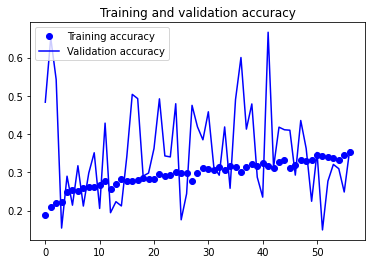

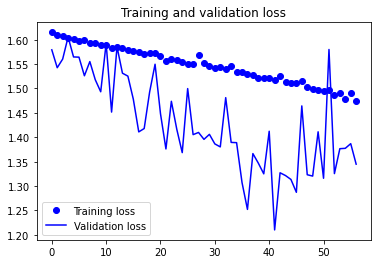

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.0001)

model4.compile(run_eagerly=True,
              optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_filepath = '/content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model4.hdf5'

checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True,
                             #save_freq = "epoch", 
                             mode='min')

es = EarlyStopping(monitor='val_loss', 
                   mode='min', 
                   verbose=1, 
                   patience=15)

tqdm_callback = tfa.callbacks.TQDMProgressBar()

history = model4.fit(training_dataset,
          validation_data=validation_dataset,
          callbacks=[es,checkpoint,tqdm_callback],
          epochs=150)

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend() 

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

536/536 [==============================] - 157s 286ms/step
Accuracy on Test Data: 0.51%
              precision    recall  f1-score   support

           0       0.74      0.66      0.70     39533
           1       0.07      0.14      0.09      3762
           2       0.15      0.02      0.04      7861
           3       0.02      0.10      0.04      1214
           4       0.02      0.08      0.04      1206

    accuracy                           0.51     53576
   macro avg       0.20      0.20      0.18     53576
weighted avg       0.57      0.51      0.53     53576



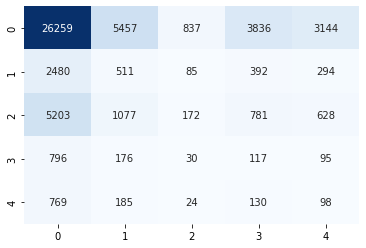

In [ ]:
model4 = load_model('/content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model4.hdf5')
model4.summary()
test_model(model4)

### Fifth Model

In [ ]:
model5 = models.Sequential()
model5.add(layers.InputLayer(input_shape=(224, 224, 3)))
model5.add(data_augmentation)
model5.add(layers.Rescaling(1./255))
model5.add(layers.Conv2D(32, (2, 2), activation='relu'))
model5.add(layers.BatchNormalization())
model5.add(layers.MaxPooling2D((2, 2)))

model5.add(layers.Conv2D(64, (2, 2), activation='relu'))
model5.add(layers.BatchNormalization())
model5.add(layers.MaxPooling2D((2, 2)))

model5.add(layers.Conv2D(128, (2, 2), activation='relu'))
model5.add(layers.BatchNormalization())
model5.add(layers.MaxPooling2D((3, 3)))

model5.add(layers.Conv2D(256, (2, 2), activation='relu'))
model5.add(layers.BatchNormalization())
model5.add(layers.MaxPooling2D((3, 3)))

model5.add(layers.Flatten())
model5.add(layers.Dense(512, activation='relu'))
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(5, activation='softmax'))

In [ ]:
model5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 223, 223, 32)      416       
                                                                 
 batch_normalization (BatchN  (None, 223, 223, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)     

Training:   0%|           0/150 ETA: ?s,  ?epochs/s

Epoch 1/150


0/32           ETA: ?s - 

Epoch 1/150
32/32 [==============================] - ETA: 0s - loss: 2.6463 - accuracy: 0.2197
Epoch 1: val_loss improved from inf to 1.26897, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model5.hdf5
32/32 [==============================] - 61s 1s/step - loss: 2.6463 - accuracy: 0.2197 - val_loss: 1.2690 - val_accuracy: 0.7350
Epoch 2/150


0/32           ETA: ?s - 

Epoch 2/150
32/32 [==============================] - ETA: 0s - loss: 1.7260 - accuracy: 0.2389
Epoch 2: val_loss improved from 1.26897 to 1.26307, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model5.hdf5
32/32 [==============================] - 45s 1s/step - loss: 1.7260 - accuracy: 0.2389 - val_loss: 1.2631 - val_accuracy: 0.7350
Epoch 3/150


0/32           ETA: ?s - 

Epoch 3/150
32/32 [==============================] - ETA: 0s - loss: 1.6177 - accuracy: 0.2571
Epoch 3: val_loss did not improve from 1.26307
32/32 [==============================] - 43s 1s/step - loss: 1.6177 - accuracy: 0.2571 - val_loss: 1.3358 - val_accuracy: 0.7350
Epoch 4/150


0/32           ETA: ?s - 

Epoch 4/150
32/32 [==============================] - ETA: 0s - loss: 1.5975 - accuracy: 0.2661
Epoch 4: val_loss did not improve from 1.26307
32/32 [==============================] - 44s 1s/step - loss: 1.5975 - accuracy: 0.2661 - val_loss: 1.3626 - val_accuracy: 0.7350
Epoch 5/150


0/32           ETA: ?s - 

Epoch 5/150
32/32 [==============================] - ETA: 0s - loss: 1.5783 - accuracy: 0.2818
Epoch 5: val_loss did not improve from 1.26307
32/32 [==============================] - 43s 1s/step - loss: 1.5783 - accuracy: 0.2818 - val_loss: 1.4793 - val_accuracy: 0.7185
Epoch 6/150


0/32           ETA: ?s - 

Epoch 6/150
32/32 [==============================] - ETA: 0s - loss: 1.5749 - accuracy: 0.2812
Epoch 6: val_loss did not improve from 1.26307
32/32 [==============================] - 43s 1s/step - loss: 1.5749 - accuracy: 0.2812 - val_loss: 1.5194 - val_accuracy: 0.5479
Epoch 7/150


0/32           ETA: ?s - 

Epoch 7/150
32/32 [==============================] - ETA: 0s - loss: 1.5735 - accuracy: 0.2815
Epoch 7: val_loss did not improve from 1.26307
32/32 [==============================] - 43s 1s/step - loss: 1.5735 - accuracy: 0.2815 - val_loss: 1.6782 - val_accuracy: 0.2835
Epoch 8/150


0/32           ETA: ?s - 

Epoch 8/150
32/32 [==============================] - ETA: 0s - loss: 1.5682 - accuracy: 0.2837
Epoch 8: val_loss did not improve from 1.26307
32/32 [==============================] - 43s 1s/step - loss: 1.5682 - accuracy: 0.2837 - val_loss: 2.1133 - val_accuracy: 0.0635
Epoch 9/150


0/32           ETA: ?s - 

Epoch 9/150
32/32 [==============================] - ETA: 0s - loss: 1.5719 - accuracy: 0.2771
Epoch 9: val_loss did not improve from 1.26307
32/32 [==============================] - 43s 1s/step - loss: 1.5719 - accuracy: 0.2771 - val_loss: 2.1433 - val_accuracy: 0.0464
Epoch 10/150


0/32           ETA: ?s - 

Epoch 10/150
32/32 [==============================] - ETA: 0s - loss: 1.5678 - accuracy: 0.2915
Epoch 10: val_loss did not improve from 1.26307
32/32 [==============================] - 43s 1s/step - loss: 1.5678 - accuracy: 0.2915 - val_loss: 2.3411 - val_accuracy: 0.0228
Epoch 11/150


0/32           ETA: ?s - 

Epoch 11/150
32/32 [==============================] - ETA: 0s - loss: 1.5419 - accuracy: 0.3075
Epoch 11: val_loss did not improve from 1.26307
32/32 [==============================] - 44s 1s/step - loss: 1.5419 - accuracy: 0.3075 - val_loss: 2.2640 - val_accuracy: 0.0236
Epoch 12/150


0/32           ETA: ?s - 

Epoch 12/150
32/32 [==============================] - ETA: 0s - loss: 1.5583 - accuracy: 0.2915
Epoch 12: val_loss did not improve from 1.26307
32/32 [==============================] - 43s 1s/step - loss: 1.5583 - accuracy: 0.2915 - val_loss: 2.1182 - val_accuracy: 0.0242
Epoch 13/150


0/32           ETA: ?s - 

Epoch 13/150
32/32 [==============================] - ETA: 0s - loss: 1.5431 - accuracy: 0.2962
Epoch 13: val_loss did not improve from 1.26307
32/32 [==============================] - 43s 1s/step - loss: 1.5431 - accuracy: 0.2962 - val_loss: 2.0205 - val_accuracy: 0.0330
Epoch 14/150


0/32           ETA: ?s - 

Epoch 14/150
32/32 [==============================] - ETA: 0s - loss: 1.5353 - accuracy: 0.3075
Epoch 14: val_loss did not improve from 1.26307
32/32 [==============================] - 43s 1s/step - loss: 1.5353 - accuracy: 0.3075 - val_loss: 1.9487 - val_accuracy: 0.0590
Epoch 15/150


0/32           ETA: ?s - 

Epoch 15/150
32/32 [==============================] - ETA: 0s - loss: 1.5310 - accuracy: 0.3085
Epoch 15: val_loss did not improve from 1.26307
32/32 [==============================] - 43s 1s/step - loss: 1.5310 - accuracy: 0.3085 - val_loss: 1.9138 - val_accuracy: 0.0632
Epoch 16/150


0/32           ETA: ?s - 

Epoch 16/150
32/32 [==============================] - ETA: 0s - loss: 1.5287 - accuracy: 0.3144
Epoch 16: val_loss did not improve from 1.26307
32/32 [==============================] - 43s 1s/step - loss: 1.5287 - accuracy: 0.3144 - val_loss: 1.7789 - val_accuracy: 0.1350
Epoch 17/150


0/32           ETA: ?s - 

Epoch 17/150
32/32 [==============================] - ETA: 0s - loss: 1.5344 - accuracy: 0.3031
Epoch 17: val_loss did not improve from 1.26307
32/32 [==============================] - 43s 1s/step - loss: 1.5344 - accuracy: 0.3031 - val_loss: 1.5943 - val_accuracy: 0.2330
Epoch 17: early stopping


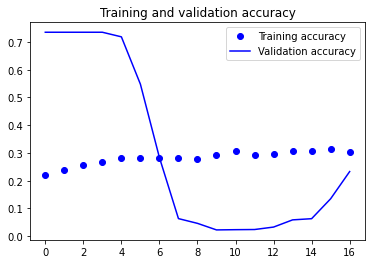

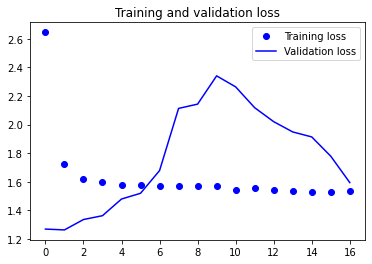

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.0001)

model5.compile(run_eagerly=True,
              optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_filepath = '/content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model5.hdf5'

checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True,
                             #save_freq = "epoch", 
                             mode='min')

es = EarlyStopping(monitor='val_loss', 
                   mode='min', 
                   verbose=1, 
                   patience=15)

tqdm_callback = tfa.callbacks.TQDMProgressBar()

history = model5.fit(training_dataset,
          validation_data=validation_dataset,
          callbacks=[es,checkpoint,tqdm_callback],
          epochs=150)

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend() 

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 223, 223, 32)      416       
                                                                 
 batch_normalization (BatchN  (None, 223, 223, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


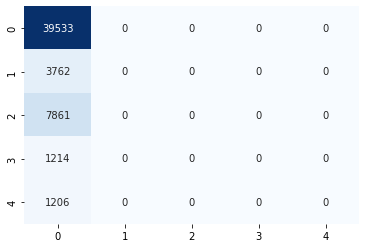

In [ ]:
model5 = load_model('/content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model5.hdf5')
model5.summary()
test_model(model5)

### Sixth Model

In [ ]:
!unzip -q "/content/drive/Shareddrives/DeepLearningProject/trainingSetALL.zip" -d "/"

In [ ]:
training_dir = PATH = '/content/trainingSetALL/'

training_dataset = tf.keras.utils.image_dataset_from_directory(
  training_dir,
  subset="training",
  seed=123,
  validation_split=0.2,
  label_mode="categorical",
  labels="inferred",
  image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
  batch_size=BATCH_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
  training_dir,
  subset="validation",
  seed=123,
  validation_split=0.2,
  label_mode="categorical",
  labels="inferred",
  image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
  batch_size=BATCH_SIZE)

Found 35124 files belonging to 5 classes.
Using 28100 files for training.
Found 35124 files belonging to 5 classes.
Using 7024 files for validation.


In [ ]:
data_augmentation = keras.Sequential(
  [
  layers.RandomFlip("vertical"),
  layers.RandomFlip("horizontal"),
  layers.RandomZoom(0.1, fill_mode="constant", fill_value=0.0),
  layers.RandomRotation(factor=1, fill_mode="constant", fill_value=0.0),
  ]
)

In [ ]:
model6 = models.Sequential()
model6.add(layers.InputLayer(input_shape=(224, 224, 3)))
model6.add(data_augmentation)
model6.add(layers.Rescaling(1./255))


model6.add(layers.Conv2D(32, (2, 2), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))

model6.add(layers.Conv2D(64, (2, 2), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))

model6.add(layers.Conv2D(128, (2, 2), activation='relu'))
model6.add(layers.MaxPooling2D((3, 3)))

model6.add(layers.Conv2D(256, (2, 2), activation='relu'))
model6.add(layers.MaxPooling2D((3, 3)))

model6.add(layers.Flatten())
model6.add(layers.Dense(512, activation='relu'))
model6.add(layers.Dense(5, activation='softmax'))

In [ ]:
model6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 223, 223, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                  

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.0001)

model6.compile(run_eagerly=True,
              optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_filepath = '/content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5'

checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True,
                             #save_freq = "epoch", 
                             mode='min')

es = EarlyStopping(monitor='val_loss', 
                   mode='min', 
                   verbose=1, 
                   patience=15)

tqdm_callback = tfa.callbacks.TQDMProgressBar()

history = model6.fit(training_dataset,
          validation_data=validation_dataset,
          callbacks=[es,checkpoint,tqdm_callback],
          epochs=150)

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend() 

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Training:   0%|           0/150 ETA: ?s,  ?epochs/s

Epoch 1/150


0/281           ETA: ?s - 

Epoch 1/150
281/281 [==============================] - ETA: 0s - loss: 0.8964 - accuracy: 0.7318
Epoch 1: val_loss improved from inf to 0.86631, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 240s 802ms/step - loss: 0.8964 - accuracy: 0.7318 - val_loss: 0.8663 - val_accuracy: 0.7390
Epoch 2/150


0/281           ETA: ?s - 

Epoch 2/150
281/281 [==============================] - ETA: 0s - loss: 0.8667 - accuracy: 0.7337
Epoch 2: val_loss improved from 0.86631 to 0.85469, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 226s 796ms/step - loss: 0.8667 - accuracy: 0.7337 - val_loss: 0.8547 - val_accuracy: 0.7390
Epoch 3/150


0/281           ETA: ?s - 

Epoch 3/150
281/281 [==============================] - ETA: 0s - loss: 0.8620 - accuracy: 0.7337
Epoch 3: val_loss did not improve from 0.85469
281/281 [==============================] - 225s 793ms/step - loss: 0.8620 - accuracy: 0.7337 - val_loss: 0.8554 - val_accuracy: 0.7390
Epoch 4/150


0/281           ETA: ?s - 

Epoch 4/150
281/281 [==============================] - ETA: 0s - loss: 0.8576 - accuracy: 0.7337
Epoch 4: val_loss did not improve from 0.85469
281/281 [==============================] - 224s 791ms/step - loss: 0.8576 - accuracy: 0.7337 - val_loss: 0.8583 - val_accuracy: 0.7390
Epoch 5/150


0/281           ETA: ?s - 

Epoch 5/150
281/281 [==============================] - ETA: 0s - loss: 0.8567 - accuracy: 0.7337
Epoch 5: val_loss did not improve from 0.85469
281/281 [==============================] - 224s 790ms/step - loss: 0.8567 - accuracy: 0.7337 - val_loss: 0.8671 - val_accuracy: 0.7390
Epoch 6/150


0/281           ETA: ?s - 

Epoch 6/150
281/281 [==============================] - ETA: 0s - loss: 0.8536 - accuracy: 0.7337
Epoch 6: val_loss improved from 0.85469 to 0.85146, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 225s 792ms/step - loss: 0.8536 - accuracy: 0.7337 - val_loss: 0.8515 - val_accuracy: 0.7390
Epoch 7/150


0/281           ETA: ?s - 

Epoch 7/150
281/281 [==============================] - ETA: 0s - loss: 0.8531 - accuracy: 0.7337
Epoch 7: val_loss did not improve from 0.85146
281/281 [==============================] - 224s 789ms/step - loss: 0.8531 - accuracy: 0.7337 - val_loss: 0.8656 - val_accuracy: 0.7390
Epoch 8/150


0/281           ETA: ?s - 

Epoch 8/150
281/281 [==============================] - ETA: 0s - loss: 0.8498 - accuracy: 0.7337
Epoch 8: val_loss improved from 0.85146 to 0.83842, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 225s 792ms/step - loss: 0.8498 - accuracy: 0.7337 - val_loss: 0.8384 - val_accuracy: 0.7390
Epoch 9/150


0/281           ETA: ?s - 

Epoch 9/150
281/281 [==============================] - ETA: 0s - loss: 0.8470 - accuracy: 0.7337
Epoch 9: val_loss did not improve from 0.83842
281/281 [==============================] - 224s 788ms/step - loss: 0.8470 - accuracy: 0.7337 - val_loss: 0.8517 - val_accuracy: 0.7390
Epoch 10/150


0/281           ETA: ?s - 

Epoch 10/150
281/281 [==============================] - ETA: 0s - loss: 0.8442 - accuracy: 0.7337
Epoch 10: val_loss improved from 0.83842 to 0.83613, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 225s 791ms/step - loss: 0.8442 - accuracy: 0.7337 - val_loss: 0.8361 - val_accuracy: 0.7390
Epoch 11/150


0/281           ETA: ?s - 

Epoch 11/150
281/281 [==============================] - ETA: 0s - loss: 0.8420 - accuracy: 0.7337
Epoch 11: val_loss did not improve from 0.83613
281/281 [==============================] - 223s 787ms/step - loss: 0.8420 - accuracy: 0.7337 - val_loss: 0.8431 - val_accuracy: 0.7390
Epoch 12/150


0/281           ETA: ?s - 

Epoch 12/150
281/281 [==============================] - ETA: 0s - loss: 0.8407 - accuracy: 0.7337
Epoch 12: val_loss did not improve from 0.83613
281/281 [==============================] - 223s 786ms/step - loss: 0.8407 - accuracy: 0.7337 - val_loss: 0.8394 - val_accuracy: 0.7390
Epoch 13/150


0/281           ETA: ?s - 

Epoch 13/150
281/281 [==============================] - ETA: 0s - loss: 0.8356 - accuracy: 0.7337
Epoch 13: val_loss did not improve from 0.83613
281/281 [==============================] - 224s 787ms/step - loss: 0.8356 - accuracy: 0.7337 - val_loss: 0.8418 - val_accuracy: 0.7390
Epoch 14/150


0/281           ETA: ?s - 

Epoch 14/150
281/281 [==============================] - ETA: 0s - loss: 0.8347 - accuracy: 0.7338
Epoch 14: val_loss did not improve from 0.83613
281/281 [==============================] - 223s 786ms/step - loss: 0.8347 - accuracy: 0.7338 - val_loss: 0.8589 - val_accuracy: 0.7389
Epoch 15/150


0/281           ETA: ?s - 

Epoch 15/150
281/281 [==============================] - ETA: 0s - loss: 0.8323 - accuracy: 0.7338
Epoch 15: val_loss improved from 0.83613 to 0.82956, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 224s 788ms/step - loss: 0.8323 - accuracy: 0.7338 - val_loss: 0.8296 - val_accuracy: 0.7390
Epoch 16/150


0/281           ETA: ?s - 

Epoch 16/150
281/281 [==============================] - ETA: 0s - loss: 0.8293 - accuracy: 0.7338
Epoch 16: val_loss did not improve from 0.82956
281/281 [==============================] - 223s 786ms/step - loss: 0.8293 - accuracy: 0.7338 - val_loss: 0.8405 - val_accuracy: 0.7389
Epoch 17/150


0/281           ETA: ?s - 

Epoch 17/150
281/281 [==============================] - ETA: 0s - loss: 0.8239 - accuracy: 0.7339
Epoch 17: val_loss improved from 0.82956 to 0.82896, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 224s 790ms/step - loss: 0.8239 - accuracy: 0.7339 - val_loss: 0.8290 - val_accuracy: 0.7392
Epoch 18/150


0/281           ETA: ?s - 

Epoch 18/150
281/281 [==============================] - ETA: 0s - loss: 0.8214 - accuracy: 0.7341
Epoch 18: val_loss improved from 0.82896 to 0.81451, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 224s 790ms/step - loss: 0.8214 - accuracy: 0.7341 - val_loss: 0.8145 - val_accuracy: 0.7389
Epoch 19/150


0/281           ETA: ?s - 

Epoch 19/150
281/281 [==============================] - ETA: 0s - loss: 0.8190 - accuracy: 0.7339
Epoch 19: val_loss did not improve from 0.81451
281/281 [==============================] - 224s 788ms/step - loss: 0.8190 - accuracy: 0.7339 - val_loss: 0.8403 - val_accuracy: 0.7390
Epoch 20/150


0/281           ETA: ?s - 

Epoch 20/150
281/281 [==============================] - ETA: 0s - loss: 0.8170 - accuracy: 0.7338
Epoch 20: val_loss did not improve from 0.81451
281/281 [==============================] - 224s 788ms/step - loss: 0.8170 - accuracy: 0.7338 - val_loss: 0.8518 - val_accuracy: 0.7389
Epoch 21/150


0/281           ETA: ?s - 

Epoch 21/150
281/281 [==============================] - ETA: 0s - loss: 0.8111 - accuracy: 0.7344
Epoch 21: val_loss did not improve from 0.81451
281/281 [==============================] - 224s 789ms/step - loss: 0.8111 - accuracy: 0.7344 - val_loss: 0.8381 - val_accuracy: 0.7389
Epoch 22/150


0/281           ETA: ?s - 

Epoch 22/150
281/281 [==============================] - ETA: 0s - loss: 0.8067 - accuracy: 0.7342
Epoch 22: val_loss did not improve from 0.81451
281/281 [==============================] - 224s 790ms/step - loss: 0.8067 - accuracy: 0.7342 - val_loss: 0.8325 - val_accuracy: 0.7388
Epoch 23/150


0/281           ETA: ?s - 

Epoch 23/150
281/281 [==============================] - ETA: 0s - loss: 0.8033 - accuracy: 0.7344
Epoch 23: val_loss did not improve from 0.81451
281/281 [==============================] - 224s 788ms/step - loss: 0.8033 - accuracy: 0.7344 - val_loss: 0.8404 - val_accuracy: 0.7389
Epoch 24/150


0/281           ETA: ?s - 

Epoch 24/150
281/281 [==============================] - ETA: 0s - loss: 0.8001 - accuracy: 0.7354
Epoch 24: val_loss did not improve from 0.81451
281/281 [==============================] - 224s 788ms/step - loss: 0.8001 - accuracy: 0.7354 - val_loss: 0.8922 - val_accuracy: 0.7389
Epoch 25/150


0/281           ETA: ?s - 

Epoch 25/150
281/281 [==============================] - ETA: 0s - loss: 0.7968 - accuracy: 0.7359
Epoch 25: val_loss did not improve from 0.81451
281/281 [==============================] - 224s 787ms/step - loss: 0.7968 - accuracy: 0.7359 - val_loss: 0.8362 - val_accuracy: 0.7389
Epoch 26/150


0/281           ETA: ?s - 

Epoch 26/150
281/281 [==============================] - ETA: 0s - loss: 0.7909 - accuracy: 0.7360
Epoch 26: val_loss did not improve from 0.81451
281/281 [==============================] - 223s 785ms/step - loss: 0.7909 - accuracy: 0.7360 - val_loss: 0.8723 - val_accuracy: 0.7393
Epoch 27/150


0/281           ETA: ?s - 

Epoch 27/150
281/281 [==============================] - ETA: 0s - loss: 0.7882 - accuracy: 0.7369
Epoch 27: val_loss did not improve from 0.81451
281/281 [==============================] - 223s 787ms/step - loss: 0.7882 - accuracy: 0.7369 - val_loss: 0.8584 - val_accuracy: 0.7392
Epoch 28/150


0/281           ETA: ?s - 

Epoch 28/150
281/281 [==============================] - ETA: 0s - loss: 0.7856 - accuracy: 0.7366
Epoch 28: val_loss did not improve from 0.81451
281/281 [==============================] - 223s 786ms/step - loss: 0.7856 - accuracy: 0.7366 - val_loss: 0.8409 - val_accuracy: 0.7393
Epoch 29/150


0/281           ETA: ?s - 

Epoch 29/150
281/281 [==============================] - ETA: 0s - loss: 0.7856 - accuracy: 0.7381
Epoch 29: val_loss improved from 0.81451 to 0.81437, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 225s 794ms/step - loss: 0.7856 - accuracy: 0.7381 - val_loss: 0.8144 - val_accuracy: 0.7397
Epoch 30/150


0/281           ETA: ?s - 

Epoch 30/150
281/281 [==============================] - ETA: 0s - loss: 0.7787 - accuracy: 0.7380
Epoch 30: val_loss improved from 0.81437 to 0.81271, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 225s 791ms/step - loss: 0.7787 - accuracy: 0.7380 - val_loss: 0.8127 - val_accuracy: 0.7388
Epoch 31/150


0/281           ETA: ?s - 

Epoch 31/150
281/281 [==============================] - ETA: 0s - loss: 0.7765 - accuracy: 0.7391
Epoch 31: val_loss did not improve from 0.81271
281/281 [==============================] - 224s 788ms/step - loss: 0.7765 - accuracy: 0.7391 - val_loss: 0.8140 - val_accuracy: 0.7396
Epoch 32/150


0/281           ETA: ?s - 

Epoch 32/150
281/281 [==============================] - ETA: 0s - loss: 0.7746 - accuracy: 0.7402
Epoch 32: val_loss did not improve from 0.81271
281/281 [==============================] - 224s 790ms/step - loss: 0.7746 - accuracy: 0.7402 - val_loss: 0.8452 - val_accuracy: 0.7396
Epoch 33/150


0/281           ETA: ?s - 

Epoch 33/150
281/281 [==============================] - ETA: 0s - loss: 0.7706 - accuracy: 0.7405
Epoch 33: val_loss did not improve from 0.81271
281/281 [==============================] - 224s 790ms/step - loss: 0.7706 - accuracy: 0.7405 - val_loss: 0.8705 - val_accuracy: 0.7399
Epoch 34/150


0/281           ETA: ?s - 

Epoch 34/150
281/281 [==============================] - ETA: 0s - loss: 0.7695 - accuracy: 0.7420
Epoch 34: val_loss improved from 0.81271 to 0.80481, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 225s 791ms/step - loss: 0.7695 - accuracy: 0.7420 - val_loss: 0.8048 - val_accuracy: 0.7395
Epoch 35/150


0/281           ETA: ?s - 

Epoch 35/150
281/281 [==============================] - ETA: 0s - loss: 0.7667 - accuracy: 0.7415
Epoch 35: val_loss did not improve from 0.80481
281/281 [==============================] - 224s 789ms/step - loss: 0.7667 - accuracy: 0.7415 - val_loss: 0.8244 - val_accuracy: 0.7397
Epoch 36/150


0/281           ETA: ?s - 

Epoch 36/150
281/281 [==============================] - ETA: 0s - loss: 0.7637 - accuracy: 0.7427
Epoch 36: val_loss did not improve from 0.80481
281/281 [==============================] - 224s 789ms/step - loss: 0.7637 - accuracy: 0.7427 - val_loss: 0.8404 - val_accuracy: 0.7406
Epoch 37/150


0/281           ETA: ?s - 

Epoch 37/150
281/281 [==============================] - ETA: 0s - loss: 0.7604 - accuracy: 0.7430
Epoch 37: val_loss did not improve from 0.80481
281/281 [==============================] - 224s 788ms/step - loss: 0.7604 - accuracy: 0.7430 - val_loss: 0.8205 - val_accuracy: 0.7410
Epoch 38/150


0/281           ETA: ?s - 

Epoch 38/150
281/281 [==============================] - ETA: 0s - loss: 0.7604 - accuracy: 0.7435
Epoch 38: val_loss improved from 0.80481 to 0.79994, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 225s 792ms/step - loss: 0.7604 - accuracy: 0.7435 - val_loss: 0.7999 - val_accuracy: 0.7423
Epoch 39/150


0/281           ETA: ?s - 

Epoch 39/150
281/281 [==============================] - ETA: 0s - loss: 0.7579 - accuracy: 0.7442
Epoch 39: val_loss did not improve from 0.79994
281/281 [==============================] - 224s 789ms/step - loss: 0.7579 - accuracy: 0.7442 - val_loss: 0.8059 - val_accuracy: 0.7416
Epoch 40/150


0/281           ETA: ?s - 

Epoch 40/150
281/281 [==============================] - ETA: 0s - loss: 0.7538 - accuracy: 0.7446
Epoch 40: val_loss improved from 0.79994 to 0.79758, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 224s 790ms/step - loss: 0.7538 - accuracy: 0.7446 - val_loss: 0.7976 - val_accuracy: 0.7419
Epoch 41/150


0/281           ETA: ?s - 

Epoch 41/150
281/281 [==============================] - ETA: 0s - loss: 0.7532 - accuracy: 0.7452
Epoch 41: val_loss improved from 0.79758 to 0.79194, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 224s 790ms/step - loss: 0.7532 - accuracy: 0.7452 - val_loss: 0.7919 - val_accuracy: 0.7426
Epoch 42/150


0/281           ETA: ?s - 

Epoch 42/150
281/281 [==============================] - ETA: 0s - loss: 0.7490 - accuracy: 0.7464
Epoch 42: val_loss did not improve from 0.79194
281/281 [==============================] - 224s 788ms/step - loss: 0.7490 - accuracy: 0.7464 - val_loss: 0.8234 - val_accuracy: 0.7419
Epoch 43/150


0/281           ETA: ?s - 

Epoch 43/150
281/281 [==============================] - ETA: 0s - loss: 0.7488 - accuracy: 0.7472
Epoch 43: val_loss did not improve from 0.79194
281/281 [==============================] - 223s 786ms/step - loss: 0.7488 - accuracy: 0.7472 - val_loss: 0.8151 - val_accuracy: 0.7419
Epoch 44/150


0/281           ETA: ?s - 

Epoch 44/150
281/281 [==============================] - ETA: 0s - loss: 0.7501 - accuracy: 0.7469
Epoch 44: val_loss did not improve from 0.79194
281/281 [==============================] - 225s 791ms/step - loss: 0.7501 - accuracy: 0.7469 - val_loss: 0.8477 - val_accuracy: 0.7405
Epoch 45/150


0/281           ETA: ?s - 

Epoch 45/150
281/281 [==============================] - ETA: 0s - loss: 0.7454 - accuracy: 0.7472
Epoch 45: val_loss did not improve from 0.79194
281/281 [==============================] - 225s 791ms/step - loss: 0.7454 - accuracy: 0.7472 - val_loss: 0.8106 - val_accuracy: 0.7422
Epoch 46/150


0/281           ETA: ?s - 

Epoch 46/150
281/281 [==============================] - ETA: 0s - loss: 0.7446 - accuracy: 0.7477
Epoch 46: val_loss did not improve from 0.79194
281/281 [==============================] - 224s 789ms/step - loss: 0.7446 - accuracy: 0.7477 - val_loss: 0.8013 - val_accuracy: 0.7432
Epoch 47/150


0/281           ETA: ?s - 

Epoch 47/150
281/281 [==============================] - ETA: 0s - loss: 0.7384 - accuracy: 0.7501
Epoch 47: val_loss did not improve from 0.79194
281/281 [==============================] - 224s 788ms/step - loss: 0.7384 - accuracy: 0.7501 - val_loss: 0.8014 - val_accuracy: 0.7442
Epoch 48/150


0/281           ETA: ?s - 

Epoch 48/150
281/281 [==============================] - ETA: 0s - loss: 0.7410 - accuracy: 0.7484
Epoch 48: val_loss did not improve from 0.79194
281/281 [==============================] - 224s 790ms/step - loss: 0.7410 - accuracy: 0.7484 - val_loss: 0.8281 - val_accuracy: 0.7420
Epoch 49/150


0/281           ETA: ?s - 

Epoch 49/150
281/281 [==============================] - ETA: 0s - loss: 0.7367 - accuracy: 0.7489
Epoch 49: val_loss did not improve from 0.79194
281/281 [==============================] - 224s 790ms/step - loss: 0.7367 - accuracy: 0.7489 - val_loss: 0.8231 - val_accuracy: 0.7432
Epoch 50/150


0/281           ETA: ?s - 

Epoch 50/150
281/281 [==============================] - ETA: 0s - loss: 0.7358 - accuracy: 0.7493
Epoch 50: val_loss improved from 0.79194 to 0.79059, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 226s 795ms/step - loss: 0.7358 - accuracy: 0.7493 - val_loss: 0.7906 - val_accuracy: 0.7460
Epoch 51/150


0/281           ETA: ?s - 

Epoch 51/150
281/281 [==============================] - ETA: 0s - loss: 0.7323 - accuracy: 0.7504
Epoch 51: val_loss improved from 0.79059 to 0.77377, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 226s 795ms/step - loss: 0.7323 - accuracy: 0.7504 - val_loss: 0.7738 - val_accuracy: 0.7472
Epoch 52/150


0/281           ETA: ?s - 

Epoch 52/150
281/281 [==============================] - ETA: 0s - loss: 0.7323 - accuracy: 0.7517
Epoch 52: val_loss did not improve from 0.77377
281/281 [==============================] - 225s 792ms/step - loss: 0.7323 - accuracy: 0.7517 - val_loss: 0.7888 - val_accuracy: 0.7452
Epoch 53/150


0/281           ETA: ?s - 

Epoch 53/150
281/281 [==============================] - ETA: 0s - loss: 0.7291 - accuracy: 0.7512
Epoch 53: val_loss did not improve from 0.77377
281/281 [==============================] - 225s 791ms/step - loss: 0.7291 - accuracy: 0.7512 - val_loss: 0.7796 - val_accuracy: 0.7462
Epoch 54/150


0/281           ETA: ?s - 

Epoch 54/150
281/281 [==============================] - ETA: 0s - loss: 0.7291 - accuracy: 0.7525
Epoch 54: val_loss did not improve from 0.77377
281/281 [==============================] - 225s 791ms/step - loss: 0.7291 - accuracy: 0.7525 - val_loss: 0.7786 - val_accuracy: 0.7477
Epoch 55/150


0/281           ETA: ?s - 

Epoch 55/150
240/281 [========================>.....] - ETA: 29s - loss: 0.7296 - accuracy: 0.7514

In [ ]:
#resume training after Colab disconnection
model6 = load_model('/content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5')
model6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 223, 223, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                  

Training:   0%|           0/80 ETA: ?s,  ?epochs/s

Epoch 1/80


0/281           ETA: ?s - 

Epoch 1/80
281/281 [==============================] - ETA: 0s - loss: 0.7323 - accuracy: 0.7501
Epoch 1: val_loss improved from inf to 0.82102, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 133s 456ms/step - loss: 0.7323 - accuracy: 0.7501 - val_loss: 0.8210 - val_accuracy: 0.7436
Epoch 2/80


0/281           ETA: ?s - 

Epoch 2/80
281/281 [==============================] - ETA: 0s - loss: 0.7297 - accuracy: 0.7521
Epoch 2: val_loss improved from 0.82102 to 0.80039, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 128s 449ms/step - loss: 0.7297 - accuracy: 0.7521 - val_loss: 0.8004 - val_accuracy: 0.7457
Epoch 3/80


0/281           ETA: ?s - 

Epoch 3/80
281/281 [==============================] - ETA: 0s - loss: 0.7289 - accuracy: 0.7510
Epoch 3: val_loss improved from 0.80039 to 0.80024, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 128s 447ms/step - loss: 0.7289 - accuracy: 0.7510 - val_loss: 0.8002 - val_accuracy: 0.7456
Epoch 4/80


0/281           ETA: ?s - 

Epoch 4/80
281/281 [==============================] - ETA: 0s - loss: 0.7297 - accuracy: 0.7530
Epoch 4: val_loss improved from 0.80024 to 0.79767, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 127s 447ms/step - loss: 0.7297 - accuracy: 0.7530 - val_loss: 0.7977 - val_accuracy: 0.7449
Epoch 5/80


0/281           ETA: ?s - 

Epoch 5/80
281/281 [==============================] - ETA: 0s - loss: 0.7243 - accuracy: 0.7531
Epoch 5: val_loss improved from 0.79767 to 0.78290, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 127s 444ms/step - loss: 0.7243 - accuracy: 0.7531 - val_loss: 0.7829 - val_accuracy: 0.7467
Epoch 6/80


0/281           ETA: ?s - 

Epoch 6/80
281/281 [==============================] - ETA: 0s - loss: 0.7266 - accuracy: 0.7520
Epoch 6: val_loss improved from 0.78290 to 0.77959, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 127s 444ms/step - loss: 0.7266 - accuracy: 0.7520 - val_loss: 0.7796 - val_accuracy: 0.7473
Epoch 7/80


0/281           ETA: ?s - 

Epoch 7/80
281/281 [==============================] - ETA: 0s - loss: 0.7266 - accuracy: 0.7527
Epoch 7: val_loss improved from 0.77959 to 0.77656, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 126s 443ms/step - loss: 0.7266 - accuracy: 0.7527 - val_loss: 0.7766 - val_accuracy: 0.7483
Epoch 8/80


0/281           ETA: ?s - 

Epoch 8/80
281/281 [==============================] - ETA: 0s - loss: 0.7192 - accuracy: 0.7546
Epoch 8: val_loss did not improve from 0.77656
281/281 [==============================] - 126s 442ms/step - loss: 0.7192 - accuracy: 0.7546 - val_loss: 0.7855 - val_accuracy: 0.7483
Epoch 9/80


0/281           ETA: ?s - 

Epoch 9/80
281/281 [==============================] - ETA: 0s - loss: 0.7215 - accuracy: 0.7546
Epoch 9: val_loss did not improve from 0.77656
281/281 [==============================] - 126s 442ms/step - loss: 0.7215 - accuracy: 0.7546 - val_loss: 0.7889 - val_accuracy: 0.7466
Epoch 10/80


0/281           ETA: ?s - 

Epoch 10/80
281/281 [==============================] - ETA: 0s - loss: 0.7210 - accuracy: 0.7550
Epoch 10: val_loss did not improve from 0.77656
281/281 [==============================] - 126s 440ms/step - loss: 0.7210 - accuracy: 0.7550 - val_loss: 0.7767 - val_accuracy: 0.7483
Epoch 11/80


0/281           ETA: ?s - 

Epoch 11/80
281/281 [==============================] - ETA: 0s - loss: 0.7184 - accuracy: 0.7553
Epoch 11: val_loss did not improve from 0.77656
281/281 [==============================] - 126s 441ms/step - loss: 0.7184 - accuracy: 0.7553 - val_loss: 0.7802 - val_accuracy: 0.7480
Epoch 12/80


0/281           ETA: ?s - 

Epoch 12/80
281/281 [==============================] - ETA: 0s - loss: 0.7177 - accuracy: 0.7551
Epoch 12: val_loss did not improve from 0.77656
281/281 [==============================] - 126s 441ms/step - loss: 0.7177 - accuracy: 0.7551 - val_loss: 0.7771 - val_accuracy: 0.7490
Epoch 13/80


0/281           ETA: ?s - 

Epoch 13/80
281/281 [==============================] - ETA: 0s - loss: 0.7150 - accuracy: 0.7556
Epoch 13: val_loss improved from 0.77656 to 0.77377, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 126s 442ms/step - loss: 0.7150 - accuracy: 0.7556 - val_loss: 0.7738 - val_accuracy: 0.7497
Epoch 14/80


0/281           ETA: ?s - 

Epoch 14/80
281/281 [==============================] - ETA: 0s - loss: 0.7171 - accuracy: 0.7537
Epoch 14: val_loss did not improve from 0.77377
281/281 [==============================] - 125s 440ms/step - loss: 0.7171 - accuracy: 0.7537 - val_loss: 0.7824 - val_accuracy: 0.7494
Epoch 15/80


0/281           ETA: ?s - 

Epoch 15/80
281/281 [==============================] - ETA: 0s - loss: 0.7152 - accuracy: 0.7556
Epoch 15: val_loss did not improve from 0.77377
281/281 [==============================] - 126s 441ms/step - loss: 0.7152 - accuracy: 0.7556 - val_loss: 0.7789 - val_accuracy: 0.7509
Epoch 16/80


0/281           ETA: ?s - 

Epoch 16/80
281/281 [==============================] - ETA: 0s - loss: 0.7122 - accuracy: 0.7577
Epoch 16: val_loss did not improve from 0.77377
281/281 [==============================] - 126s 442ms/step - loss: 0.7122 - accuracy: 0.7577 - val_loss: 0.7743 - val_accuracy: 0.7470
Epoch 17/80


0/281           ETA: ?s - 

Epoch 17/80
281/281 [==============================] - ETA: 0s - loss: 0.7126 - accuracy: 0.7578
Epoch 17: val_loss did not improve from 0.77377
281/281 [==============================] - 126s 441ms/step - loss: 0.7126 - accuracy: 0.7578 - val_loss: 0.7853 - val_accuracy: 0.7496
Epoch 18/80


0/281           ETA: ?s - 

Epoch 18/80
281/281 [==============================] - ETA: 0s - loss: 0.7150 - accuracy: 0.7557
Epoch 18: val_loss improved from 0.77377 to 0.77026, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 126s 443ms/step - loss: 0.7150 - accuracy: 0.7557 - val_loss: 0.7703 - val_accuracy: 0.7507
Epoch 19/80


0/281           ETA: ?s - 

Epoch 19/80
281/281 [==============================] - ETA: 0s - loss: 0.7098 - accuracy: 0.7573
Epoch 19: val_loss did not improve from 0.77026
281/281 [==============================] - 125s 439ms/step - loss: 0.7098 - accuracy: 0.7573 - val_loss: 0.7792 - val_accuracy: 0.7494
Epoch 20/80


0/281           ETA: ?s - 

Epoch 20/80
281/281 [==============================] - ETA: 0s - loss: 0.7095 - accuracy: 0.7564
Epoch 20: val_loss improved from 0.77026 to 0.76222, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 126s 441ms/step - loss: 0.7095 - accuracy: 0.7564 - val_loss: 0.7622 - val_accuracy: 0.7496
Epoch 21/80


0/281           ETA: ?s - 

Epoch 21/80
281/281 [==============================] - ETA: 0s - loss: 0.7088 - accuracy: 0.7561
Epoch 21: val_loss did not improve from 0.76222
281/281 [==============================] - 126s 440ms/step - loss: 0.7088 - accuracy: 0.7561 - val_loss: 0.7694 - val_accuracy: 0.7514
Epoch 22/80


0/281           ETA: ?s - 

Epoch 22/80
281/281 [==============================] - ETA: 0s - loss: 0.7093 - accuracy: 0.7568
Epoch 22: val_loss did not improve from 0.76222
281/281 [==============================] - 125s 438ms/step - loss: 0.7093 - accuracy: 0.7568 - val_loss: 0.7902 - val_accuracy: 0.7490
Epoch 23/80


0/281           ETA: ?s - 

Epoch 23/80
281/281 [==============================] - ETA: 0s - loss: 0.7055 - accuracy: 0.7594
Epoch 23: val_loss did not improve from 0.76222
281/281 [==============================] - 125s 438ms/step - loss: 0.7055 - accuracy: 0.7594 - val_loss: 0.7641 - val_accuracy: 0.7511
Epoch 24/80


0/281           ETA: ?s - 

Epoch 24/80
281/281 [==============================] - ETA: 0s - loss: 0.7046 - accuracy: 0.7594
Epoch 24: val_loss did not improve from 0.76222
281/281 [==============================] - 130s 455ms/step - loss: 0.7046 - accuracy: 0.7594 - val_loss: 0.7812 - val_accuracy: 0.7500
Epoch 25/80


0/281           ETA: ?s - 

Epoch 25/80
281/281 [==============================] - ETA: 0s - loss: 0.7021 - accuracy: 0.7584
Epoch 25: val_loss improved from 0.76222 to 0.76174, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 127s 444ms/step - loss: 0.7021 - accuracy: 0.7584 - val_loss: 0.7617 - val_accuracy: 0.7527
Epoch 26/80


0/281           ETA: ?s - 

Epoch 26/80
281/281 [==============================] - ETA: 0s - loss: 0.7023 - accuracy: 0.7585
Epoch 26: val_loss improved from 0.76174 to 0.75541, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 126s 443ms/step - loss: 0.7023 - accuracy: 0.7585 - val_loss: 0.7554 - val_accuracy: 0.7544
Epoch 27/80


0/281           ETA: ?s - 

Epoch 27/80
281/281 [==============================] - ETA: 0s - loss: 0.7055 - accuracy: 0.7591
Epoch 27: val_loss did not improve from 0.75541
281/281 [==============================] - 126s 442ms/step - loss: 0.7055 - accuracy: 0.7591 - val_loss: 0.7572 - val_accuracy: 0.7503
Epoch 28/80


0/281           ETA: ?s - 

Epoch 28/80
281/281 [==============================] - ETA: 0s - loss: 0.6990 - accuracy: 0.7607
Epoch 28: val_loss did not improve from 0.75541
281/281 [==============================] - 126s 441ms/step - loss: 0.6990 - accuracy: 0.7607 - val_loss: 0.7687 - val_accuracy: 0.7524
Epoch 29/80


0/281           ETA: ?s - 

Epoch 29/80
281/281 [==============================] - ETA: 0s - loss: 0.6973 - accuracy: 0.7612
Epoch 29: val_loss did not improve from 0.75541
281/281 [==============================] - 126s 442ms/step - loss: 0.6973 - accuracy: 0.7612 - val_loss: 0.7580 - val_accuracy: 0.7517
Epoch 30/80


0/281           ETA: ?s - 

Epoch 30/80
281/281 [==============================] - ETA: 0s - loss: 0.6970 - accuracy: 0.7618
Epoch 30: val_loss did not improve from 0.75541
281/281 [==============================] - 126s 441ms/step - loss: 0.6970 - accuracy: 0.7618 - val_loss: 0.7796 - val_accuracy: 0.7507
Epoch 31/80


0/281           ETA: ?s - 

Epoch 31/80
281/281 [==============================] - ETA: 0s - loss: 0.6970 - accuracy: 0.7614
Epoch 31: val_loss did not improve from 0.75541
281/281 [==============================] - 126s 441ms/step - loss: 0.6970 - accuracy: 0.7614 - val_loss: 0.7820 - val_accuracy: 0.7526
Epoch 32/80


0/281           ETA: ?s - 

Epoch 32/80
281/281 [==============================] - ETA: 0s - loss: 0.6961 - accuracy: 0.7610
Epoch 32: val_loss did not improve from 0.75541
281/281 [==============================] - 126s 441ms/step - loss: 0.6961 - accuracy: 0.7610 - val_loss: 0.7778 - val_accuracy: 0.7459
Epoch 33/80


0/281           ETA: ?s - 

Epoch 33/80
281/281 [==============================] - ETA: 0s - loss: 0.6988 - accuracy: 0.7600
Epoch 33: val_loss did not improve from 0.75541
281/281 [==============================] - 125s 439ms/step - loss: 0.6988 - accuracy: 0.7600 - val_loss: 0.7556 - val_accuracy: 0.7533
Epoch 34/80


0/281           ETA: ?s - 

Epoch 34/80
281/281 [==============================] - ETA: 0s - loss: 0.6946 - accuracy: 0.7624
Epoch 34: val_loss did not improve from 0.75541
281/281 [==============================] - 126s 440ms/step - loss: 0.6946 - accuracy: 0.7624 - val_loss: 0.7769 - val_accuracy: 0.7528
Epoch 35/80


0/281           ETA: ?s - 

Epoch 35/80
281/281 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.7619
Epoch 35: val_loss did not improve from 0.75541
281/281 [==============================] - 126s 441ms/step - loss: 0.6929 - accuracy: 0.7619 - val_loss: 0.7783 - val_accuracy: 0.7528
Epoch 36/80


0/281           ETA: ?s - 

Epoch 36/80
281/281 [==============================] - ETA: 0s - loss: 0.6938 - accuracy: 0.7611
Epoch 36: val_loss improved from 0.75541 to 0.75318, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 127s 444ms/step - loss: 0.6938 - accuracy: 0.7611 - val_loss: 0.7532 - val_accuracy: 0.7544
Epoch 37/80


0/281           ETA: ?s - 

Epoch 37/80
281/281 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.7614
Epoch 37: val_loss did not improve from 0.75318
281/281 [==============================] - 126s 442ms/step - loss: 0.6937 - accuracy: 0.7614 - val_loss: 0.7558 - val_accuracy: 0.7541
Epoch 38/80


0/281           ETA: ?s - 

Epoch 38/80
281/281 [==============================] - ETA: 0s - loss: 0.6897 - accuracy: 0.7640
Epoch 38: val_loss improved from 0.75318 to 0.74476, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 127s 445ms/step - loss: 0.6897 - accuracy: 0.7640 - val_loss: 0.7448 - val_accuracy: 0.7547
Epoch 39/80


0/281           ETA: ?s - 

Epoch 39/80
281/281 [==============================] - ETA: 0s - loss: 0.6917 - accuracy: 0.7631
Epoch 39: val_loss did not improve from 0.74476
281/281 [==============================] - 126s 442ms/step - loss: 0.6917 - accuracy: 0.7631 - val_loss: 0.7552 - val_accuracy: 0.7550
Epoch 40/80


0/281           ETA: ?s - 

Epoch 40/80
281/281 [==============================] - ETA: 0s - loss: 0.6893 - accuracy: 0.7635
Epoch 40: val_loss did not improve from 0.74476
281/281 [==============================] - 126s 443ms/step - loss: 0.6893 - accuracy: 0.7635 - val_loss: 0.7626 - val_accuracy: 0.7540
Epoch 41/80


0/281           ETA: ?s - 

Epoch 41/80
281/281 [==============================] - ETA: 0s - loss: 0.6885 - accuracy: 0.7647
Epoch 41: val_loss did not improve from 0.74476
281/281 [==============================] - 126s 442ms/step - loss: 0.6885 - accuracy: 0.7647 - val_loss: 0.7811 - val_accuracy: 0.7533
Epoch 42/80


0/281           ETA: ?s - 

Epoch 42/80
281/281 [==============================] - ETA: 0s - loss: 0.6915 - accuracy: 0.7628
Epoch 42: val_loss did not improve from 0.74476
281/281 [==============================] - 126s 441ms/step - loss: 0.6915 - accuracy: 0.7628 - val_loss: 0.7877 - val_accuracy: 0.7524
Epoch 43/80


0/281           ETA: ?s - 

Epoch 43/80
281/281 [==============================] - ETA: 0s - loss: 0.6866 - accuracy: 0.7622
Epoch 43: val_loss did not improve from 0.74476
281/281 [==============================] - 125s 439ms/step - loss: 0.6866 - accuracy: 0.7622 - val_loss: 0.7717 - val_accuracy: 0.7524
Epoch 44/80


0/281           ETA: ?s - 

Epoch 44/80
281/281 [==============================] - ETA: 0s - loss: 0.6888 - accuracy: 0.7632
Epoch 44: val_loss did not improve from 0.74476
281/281 [==============================] - 126s 444ms/step - loss: 0.6888 - accuracy: 0.7632 - val_loss: 0.7595 - val_accuracy: 0.7548
Epoch 45/80


0/281           ETA: ?s - 

Epoch 45/80
281/281 [==============================] - ETA: 0s - loss: 0.6843 - accuracy: 0.7636
Epoch 45: val_loss did not improve from 0.74476
281/281 [==============================] - 126s 440ms/step - loss: 0.6843 - accuracy: 0.7636 - val_loss: 0.7512 - val_accuracy: 0.7548
Epoch 46/80


0/281           ETA: ?s - 

Epoch 46/80
281/281 [==============================] - ETA: 0s - loss: 0.6876 - accuracy: 0.7639
Epoch 46: val_loss did not improve from 0.74476
281/281 [==============================] - 126s 441ms/step - loss: 0.6876 - accuracy: 0.7639 - val_loss: 0.7750 - val_accuracy: 0.7537
Epoch 47/80


0/281           ETA: ?s - 

Epoch 47/80
281/281 [==============================] - ETA: 0s - loss: 0.6860 - accuracy: 0.7652
Epoch 47: val_loss did not improve from 0.74476
281/281 [==============================] - 126s 441ms/step - loss: 0.6860 - accuracy: 0.7652 - val_loss: 0.7842 - val_accuracy: 0.7538
Epoch 48/80


0/281           ETA: ?s - 

Epoch 48/80
281/281 [==============================] - ETA: 0s - loss: 0.6830 - accuracy: 0.7646
Epoch 48: val_loss did not improve from 0.74476
281/281 [==============================] - 126s 441ms/step - loss: 0.6830 - accuracy: 0.7646 - val_loss: 0.7555 - val_accuracy: 0.7544
Epoch 49/80


0/281           ETA: ?s - 

Epoch 49/80
281/281 [==============================] - ETA: 0s - loss: 0.6817 - accuracy: 0.7642
Epoch 49: val_loss did not improve from 0.74476
281/281 [==============================] - 126s 441ms/step - loss: 0.6817 - accuracy: 0.7642 - val_loss: 0.7538 - val_accuracy: 0.7547
Epoch 50/80


0/281           ETA: ?s - 

Epoch 50/80
281/281 [==============================] - ETA: 0s - loss: 0.6812 - accuracy: 0.7633
Epoch 50: val_loss did not improve from 0.74476
281/281 [==============================] - 126s 441ms/step - loss: 0.6812 - accuracy: 0.7633 - val_loss: 0.7584 - val_accuracy: 0.7547
Epoch 51/80


0/281           ETA: ?s - 

Epoch 51/80
281/281 [==============================] - ETA: 0s - loss: 0.6767 - accuracy: 0.7665
Epoch 51: val_loss did not improve from 0.74476
281/281 [==============================] - 126s 441ms/step - loss: 0.6767 - accuracy: 0.7665 - val_loss: 0.7496 - val_accuracy: 0.7558
Epoch 52/80


0/281           ETA: ?s - 

Epoch 52/80
281/281 [==============================] - ETA: 0s - loss: 0.6797 - accuracy: 0.7664
Epoch 52: val_loss improved from 0.74476 to 0.74458, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 127s 444ms/step - loss: 0.6797 - accuracy: 0.7664 - val_loss: 0.7446 - val_accuracy: 0.7573
Epoch 53/80


0/281           ETA: ?s - 

Epoch 53/80
281/281 [==============================] - ETA: 0s - loss: 0.6791 - accuracy: 0.7660
Epoch 53: val_loss did not improve from 0.74458
281/281 [==============================] - 126s 443ms/step - loss: 0.6791 - accuracy: 0.7660 - val_loss: 0.7700 - val_accuracy: 0.7554
Epoch 54/80


0/281           ETA: ?s - 

Epoch 54/80
281/281 [==============================] - ETA: 0s - loss: 0.6774 - accuracy: 0.7658
Epoch 54: val_loss did not improve from 0.74458
281/281 [==============================] - 126s 442ms/step - loss: 0.6774 - accuracy: 0.7658 - val_loss: 0.7741 - val_accuracy: 0.7567
Epoch 55/80


0/281           ETA: ?s - 

Epoch 55/80
281/281 [==============================] - ETA: 0s - loss: 0.6740 - accuracy: 0.7677
Epoch 55: val_loss did not improve from 0.74458
281/281 [==============================] - 126s 442ms/step - loss: 0.6740 - accuracy: 0.7677 - val_loss: 0.7533 - val_accuracy: 0.7571
Epoch 56/80


0/281           ETA: ?s - 

Epoch 56/80
281/281 [==============================] - ETA: 0s - loss: 0.6754 - accuracy: 0.7688
Epoch 56: val_loss did not improve from 0.74458
281/281 [==============================] - 125s 439ms/step - loss: 0.6754 - accuracy: 0.7688 - val_loss: 0.7568 - val_accuracy: 0.7573
Epoch 57/80


0/281           ETA: ?s - 

Epoch 57/80
281/281 [==============================] - ETA: 0s - loss: 0.6773 - accuracy: 0.7660
Epoch 57: val_loss did not improve from 0.74458
281/281 [==============================] - 126s 441ms/step - loss: 0.6773 - accuracy: 0.7660 - val_loss: 0.7581 - val_accuracy: 0.7548
Epoch 58/80


0/281           ETA: ?s - 

Epoch 58/80
281/281 [==============================] - ETA: 0s - loss: 0.6776 - accuracy: 0.7669
Epoch 58: val_loss did not improve from 0.74458
281/281 [==============================] - 126s 443ms/step - loss: 0.6776 - accuracy: 0.7669 - val_loss: 0.7611 - val_accuracy: 0.7533
Epoch 59/80


0/281           ETA: ?s - 

Epoch 59/80
281/281 [==============================] - ETA: 0s - loss: 0.6760 - accuracy: 0.7658
Epoch 59: val_loss did not improve from 0.74458
281/281 [==============================] - 125s 440ms/step - loss: 0.6760 - accuracy: 0.7658 - val_loss: 0.7513 - val_accuracy: 0.7558
Epoch 60/80


0/281           ETA: ?s - 

Epoch 60/80
281/281 [==============================] - ETA: 0s - loss: 0.6685 - accuracy: 0.7686
Epoch 60: val_loss did not improve from 0.74458
281/281 [==============================] - 126s 441ms/step - loss: 0.6685 - accuracy: 0.7686 - val_loss: 0.7544 - val_accuracy: 0.7554
Epoch 61/80


0/281           ETA: ?s - 

Epoch 61/80
281/281 [==============================] - ETA: 0s - loss: 0.6704 - accuracy: 0.7678
Epoch 61: val_loss did not improve from 0.74458
281/281 [==============================] - 126s 442ms/step - loss: 0.6704 - accuracy: 0.7678 - val_loss: 0.7458 - val_accuracy: 0.7585
Epoch 62/80


0/281           ETA: ?s - 

Epoch 62/80
281/281 [==============================] - ETA: 0s - loss: 0.6693 - accuracy: 0.7685
Epoch 62: val_loss did not improve from 0.74458
281/281 [==============================] - 126s 442ms/step - loss: 0.6693 - accuracy: 0.7685 - val_loss: 0.7637 - val_accuracy: 0.7574
Epoch 63/80


0/281           ETA: ?s - 

Epoch 63/80
281/281 [==============================] - ETA: 0s - loss: 0.6702 - accuracy: 0.7685
Epoch 63: val_loss did not improve from 0.74458
281/281 [==============================] - 126s 442ms/step - loss: 0.6702 - accuracy: 0.7685 - val_loss: 0.7478 - val_accuracy: 0.7581
Epoch 64/80


0/281           ETA: ?s - 

Epoch 64/80
281/281 [==============================] - ETA: 0s - loss: 0.6713 - accuracy: 0.7688
Epoch 64: val_loss did not improve from 0.74458
281/281 [==============================] - 126s 443ms/step - loss: 0.6713 - accuracy: 0.7688 - val_loss: 0.7678 - val_accuracy: 0.7558
Epoch 65/80


0/281           ETA: ?s - 

Epoch 65/80
281/281 [==============================] - ETA: 0s - loss: 0.6703 - accuracy: 0.7682
Epoch 65: val_loss did not improve from 0.74458
281/281 [==============================] - 127s 444ms/step - loss: 0.6703 - accuracy: 0.7682 - val_loss: 0.7776 - val_accuracy: 0.7574
Epoch 66/80


0/281           ETA: ?s - 

Epoch 66/80
281/281 [==============================] - ETA: 0s - loss: 0.6668 - accuracy: 0.7698
Epoch 66: val_loss did not improve from 0.74458
281/281 [==============================] - 127s 444ms/step - loss: 0.6668 - accuracy: 0.7698 - val_loss: 0.7510 - val_accuracy: 0.7551
Epoch 67/80


0/281           ETA: ?s - 

Epoch 67/80
281/281 [==============================] - ETA: 0s - loss: 0.6662 - accuracy: 0.7699
Epoch 67: val_loss did not improve from 0.74458
281/281 [==============================] - 126s 443ms/step - loss: 0.6662 - accuracy: 0.7699 - val_loss: 0.7609 - val_accuracy: 0.7573
Epoch 67: early stopping


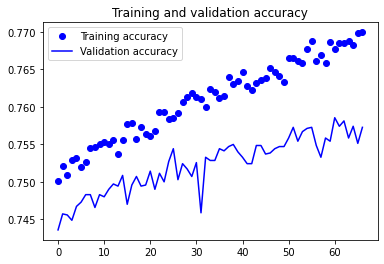

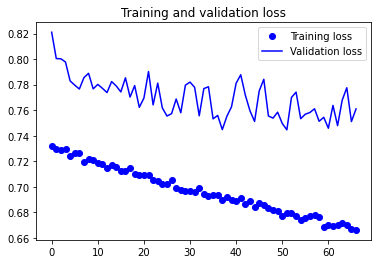

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.0001)

model6.compile(run_eagerly=True,
              optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_filepath = '/content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5'

checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True,
                             #save_freq = "epoch", 
                             mode='min')

es = EarlyStopping(monitor='val_loss', 
                   mode='min', 
                   verbose=1, 
                   patience=15)

tqdm_callback = tfa.callbacks.TQDMProgressBar()

history = model6.fit(training_dataset,
          validation_data=validation_dataset,
          callbacks=[es,checkpoint,tqdm_callback],
          epochs=80)

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend() 

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

536/536 [==============================] - 160s 294ms/step
Accuracy on Test Data: 0.67%
              precision    recall  f1-score   support

           0       0.74      0.89      0.81     39533
           1       0.00      0.00      0.00      3762
           2       0.15      0.10      0.12      7861
           3       0.02      0.00      0.01      1214
           4       0.02      0.01      0.01      1206

    accuracy                           0.67     53576
   macro avg       0.19      0.20      0.19     53576
weighted avg       0.57      0.67      0.61     53576



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


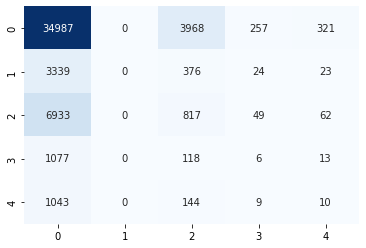

In [ ]:
test_model(model6)